In [1]:
from __future__ import division, print_function
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras.layers import Dense,BatchNormalization
from tensorflow.python.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
import os
import matplotlib.pyplot as plt


In [2]:
data = np.load('/home/chase/Boyka/Lyu/fac_cond256_unit8.npz')
raw_X=data['cond']
raw_X=np.squeeze(raw_X)
raw_Y=data['fac']
raw_Y=raw_Y.astype(np.float64)
NUM_TIMESTEPS = 65
BATCH_SIZE = 256   
NUM_EPOCHS = 10000
Xtrain=raw_X[:-1000]
Ytrain=raw_Y[:-1000]
Xtest=raw_X[-1000:]
Ytest=raw_Y[-1000:]


In [3]:
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(2000, 65) (1000, 65) (2000, 3) (1000, 3)


In [4]:
model = Sequential()
model.add(Dense(64,activation= 'sigmoid',input_shape=(65,)))
model.add(BatchNormalization())
model.add(Dense(128,activation= 'sigmoid'))
model.add(BatchNormalization())
model.add(Dense(256,activation= 'sigmoid'))
model.add(BatchNormalization())
model.add(Dense(100,activation= 'sigmoid'))
model.add(BatchNormalization())
model.add(Dense(3))
model.summary()

model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4224      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               2

In [5]:
history=model.fit(Xtrain, Ytrain, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(Xtest, Ytest),shuffle=True)
score, _ = model.evaluate(Xtest, Ytest, batch_size=BATCH_SIZE)
rmse = math.sqrt(score)
model.save('fc_bn.h5')
 

Epoch 1/10000
8/8 [==============================] - 2s 34ms/step - loss: 3.9540 - mean_squared_error: 3.9540 - val_loss: 6.1194 - val_mean_squared_error: 6.1194
Epoch 2/10000
8/8 [==============================] - 0s 14ms/step - loss: 3.2866 - mean_squared_error: 3.2866 - val_loss: 5.6804 - val_mean_squared_error: 5.6804
Epoch 3/10000
8/8 [==============================] - 0s 14ms/step - loss: 3.0213 - mean_squared_error: 3.0213 - val_loss: 5.2661 - val_mean_squared_error: 5.2661
Epoch 4/10000
8/8 [==============================] - 0s 13ms/step - loss: 2.7964 - mean_squared_error: 2.7964 - val_loss: 4.8492 - val_mean_squared_error: 4.8492
Epoch 5/10000
8/8 [==============================] - 0s 14ms/step - loss: 2.5771 - mean_squared_error: 2.5771 - val_loss: 4.4471 - val_mean_squared_error: 4.4471
Epoch 6/10000
8/8 [==============================] - 0s 14ms/step - loss: 2.3524 - mean_squared_error: 2.3524 - val_loss: 4.0528 - val_mean_squared_error: 4.0528
Epoch 7/10000
8/8 [=========

8/8 [==============================] - 0s 14ms/step - loss: 0.2033 - mean_squared_error: 0.2033 - val_loss: 1.0591 - val_mean_squared_error: 1.0591
Epoch 102/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1877 - mean_squared_error: 0.1877 - val_loss: 0.7063 - val_mean_squared_error: 0.7063
Epoch 103/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1835 - mean_squared_error: 0.1835 - val_loss: 0.5489 - val_mean_squared_error: 0.5489
Epoch 104/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1898 - mean_squared_error: 0.1898 - val_loss: 0.5568 - val_mean_squared_error: 0.5568
Epoch 105/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1863 - mean_squared_error: 0.1863 - val_loss: 1.1021 - val_mean_squared_error: 1.1021
Epoch 106/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.1776 - mean_squared_error: 0.1776 - val_loss: 1.1862 - val_mean_squared_error: 1.1862
Epoch 107/10000
8/8 [===========

8/8 [==============================] - 0s 14ms/step - loss: 0.1902 - mean_squared_error: 0.1902 - val_loss: 0.6856 - val_mean_squared_error: 0.6856
Epoch 152/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.1840 - mean_squared_error: 0.1840 - val_loss: 0.7444 - val_mean_squared_error: 0.7444
Epoch 153/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1797 - mean_squared_error: 0.1797 - val_loss: 1.0683 - val_mean_squared_error: 1.0683
Epoch 154/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1798 - mean_squared_error: 0.1798 - val_loss: 0.7610 - val_mean_squared_error: 0.7610
Epoch 155/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1904 - mean_squared_error: 0.1904 - val_loss: 1.2020 - val_mean_squared_error: 1.2020
Epoch 156/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1738 - mean_squared_error: 0.1738 - val_loss: 0.6957 - val_mean_squared_error: 0.6957
Epoch 157/10000
8/8 [===========

8/8 [==============================] - 0s 17ms/step - loss: 0.1642 - mean_squared_error: 0.1642 - val_loss: 0.3048 - val_mean_squared_error: 0.3048
Epoch 202/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.1634 - mean_squared_error: 0.1634 - val_loss: 0.5875 - val_mean_squared_error: 0.5875
Epoch 203/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.1635 - mean_squared_error: 0.1635 - val_loss: 0.7942 - val_mean_squared_error: 0.7942
Epoch 204/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1687 - mean_squared_error: 0.1687 - val_loss: 0.2848 - val_mean_squared_error: 0.2848
Epoch 205/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.1665 - mean_squared_error: 0.1665 - val_loss: 0.5856 - val_mean_squared_error: 0.5856
Epoch 206/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.1602 - mean_squared_error: 0.1602 - val_loss: 0.7635 - val_mean_squared_error: 0.7635
Epoch 207/10000
8/8 [===========

8/8 [==============================] - 0s 15ms/step - loss: 0.1607 - mean_squared_error: 0.1607 - val_loss: 0.4414 - val_mean_squared_error: 0.4414
Epoch 252/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1501 - mean_squared_error: 0.1501 - val_loss: 0.5863 - val_mean_squared_error: 0.5863
Epoch 253/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.1600 - mean_squared_error: 0.1600 - val_loss: 0.4151 - val_mean_squared_error: 0.4151
Epoch 254/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.1543 - mean_squared_error: 0.1543 - val_loss: 0.5712 - val_mean_squared_error: 0.5712
Epoch 255/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1634 - mean_squared_error: 0.1634 - val_loss: 0.5936 - val_mean_squared_error: 0.5936
Epoch 256/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.1663 - mean_squared_error: 0.1663 - val_loss: 1.1228 - val_mean_squared_error: 1.1228
Epoch 257/10000
8/8 [===========

8/8 [==============================] - 0s 14ms/step - loss: 0.1496 - mean_squared_error: 0.1496 - val_loss: 0.5905 - val_mean_squared_error: 0.5905
Epoch 302/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1478 - mean_squared_error: 0.1478 - val_loss: 0.7830 - val_mean_squared_error: 0.7830
Epoch 303/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1479 - mean_squared_error: 0.1479 - val_loss: 1.2712 - val_mean_squared_error: 1.2712
Epoch 304/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1609 - mean_squared_error: 0.1609 - val_loss: 1.1101 - val_mean_squared_error: 1.1101
Epoch 305/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.1500 - mean_squared_error: 0.1500 - val_loss: 0.5256 - val_mean_squared_error: 0.5256
Epoch 306/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.1520 - mean_squared_error: 0.1520 - val_loss: 0.8003 - val_mean_squared_error: 0.8003
Epoch 307/10000
8/8 [===========

8/8 [==============================] - 0s 14ms/step - loss: 0.1520 - mean_squared_error: 0.1520 - val_loss: 0.2819 - val_mean_squared_error: 0.2819
Epoch 352/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1412 - mean_squared_error: 0.1412 - val_loss: 0.6838 - val_mean_squared_error: 0.6838
Epoch 353/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1380 - mean_squared_error: 0.1380 - val_loss: 0.6090 - val_mean_squared_error: 0.6090
Epoch 354/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1384 - mean_squared_error: 0.1384 - val_loss: 0.7277 - val_mean_squared_error: 0.7277
Epoch 355/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1454 - mean_squared_error: 0.1454 - val_loss: 0.5509 - val_mean_squared_error: 0.5509
Epoch 356/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1533 - mean_squared_error: 0.1533 - val_loss: 0.6827 - val_mean_squared_error: 0.6827
Epoch 357/10000
8/8 [===========

8/8 [==============================] - 0s 14ms/step - loss: 0.1286 - mean_squared_error: 0.1286 - val_loss: 0.6321 - val_mean_squared_error: 0.6321
Epoch 402/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.1279 - mean_squared_error: 0.1279 - val_loss: 0.9163 - val_mean_squared_error: 0.9163
Epoch 403/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1368 - mean_squared_error: 0.1368 - val_loss: 0.5688 - val_mean_squared_error: 0.5688
Epoch 404/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1376 - mean_squared_error: 0.1376 - val_loss: 0.8722 - val_mean_squared_error: 0.8722
Epoch 405/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1424 - mean_squared_error: 0.1424 - val_loss: 1.1316 - val_mean_squared_error: 1.1316
Epoch 406/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1356 - mean_squared_error: 0.1356 - val_loss: 0.4734 - val_mean_squared_error: 0.4734
Epoch 407/10000
8/8 [===========

8/8 [==============================] - 0s 13ms/step - loss: 0.1139 - mean_squared_error: 0.1139 - val_loss: 0.3997 - val_mean_squared_error: 0.3997
Epoch 452/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.1113 - mean_squared_error: 0.1113 - val_loss: 0.5797 - val_mean_squared_error: 0.5797
Epoch 453/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1178 - mean_squared_error: 0.1178 - val_loss: 0.5806 - val_mean_squared_error: 0.5806
Epoch 454/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1202 - mean_squared_error: 0.1202 - val_loss: 0.9880 - val_mean_squared_error: 0.9880
Epoch 455/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.1217 - mean_squared_error: 0.1217 - val_loss: 0.6938 - val_mean_squared_error: 0.6938
Epoch 456/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1189 - mean_squared_error: 0.1189 - val_loss: 0.5889 - val_mean_squared_error: 0.5889
Epoch 457/10000
8/8 [===========

8/8 [==============================] - 0s 14ms/step - loss: 0.1131 - mean_squared_error: 0.1131 - val_loss: 0.8861 - val_mean_squared_error: 0.8861
Epoch 502/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.1166 - mean_squared_error: 0.1166 - val_loss: 0.4076 - val_mean_squared_error: 0.4076
Epoch 503/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1123 - mean_squared_error: 0.1123 - val_loss: 0.3650 - val_mean_squared_error: 0.3650
Epoch 504/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.1031 - mean_squared_error: 0.1031 - val_loss: 0.6458 - val_mean_squared_error: 0.6458
Epoch 505/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.1083 - mean_squared_error: 0.1083 - val_loss: 0.4130 - val_mean_squared_error: 0.4130
Epoch 506/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.1096 - mean_squared_error: 0.1096 - val_loss: 0.4419 - val_mean_squared_error: 0.4419
Epoch 507/10000
8/8 [===========

8/8 [==============================] - 0s 14ms/step - loss: 0.1051 - mean_squared_error: 0.1051 - val_loss: 0.5215 - val_mean_squared_error: 0.5215
Epoch 552/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.1050 - mean_squared_error: 0.1050 - val_loss: 0.6002 - val_mean_squared_error: 0.6002
Epoch 553/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.1005 - mean_squared_error: 0.1005 - val_loss: 0.5148 - val_mean_squared_error: 0.5148
Epoch 554/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0943 - mean_squared_error: 0.0943 - val_loss: 0.4707 - val_mean_squared_error: 0.4707
Epoch 555/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0931 - mean_squared_error: 0.0931 - val_loss: 0.5403 - val_mean_squared_error: 0.5403
Epoch 556/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0949 - mean_squared_error: 0.0949 - val_loss: 0.5439 - val_mean_squared_error: 0.5439
Epoch 557/10000
8/8 [===========

8/8 [==============================] - 0s 14ms/step - loss: 0.0919 - mean_squared_error: 0.0919 - val_loss: 0.7374 - val_mean_squared_error: 0.7374
Epoch 602/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0869 - mean_squared_error: 0.0869 - val_loss: 0.7985 - val_mean_squared_error: 0.7985
Epoch 603/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0864 - mean_squared_error: 0.0864 - val_loss: 0.4443 - val_mean_squared_error: 0.4443
Epoch 604/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0944 - mean_squared_error: 0.0944 - val_loss: 0.8636 - val_mean_squared_error: 0.8636
Epoch 605/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0945 - mean_squared_error: 0.0945 - val_loss: 0.7944 - val_mean_squared_error: 0.7944
Epoch 606/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0909 - mean_squared_error: 0.0909 - val_loss: 1.0162 - val_mean_squared_error: 1.0162
Epoch 607/10000
8/8 [===========

8/8 [==============================] - 0s 14ms/step - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.3792 - val_mean_squared_error: 0.3792
Epoch 652/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.5611 - val_mean_squared_error: 0.5611
Epoch 653/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0867 - mean_squared_error: 0.0867 - val_loss: 0.8414 - val_mean_squared_error: 0.8414
Epoch 654/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0830 - mean_squared_error: 0.0830 - val_loss: 0.6268 - val_mean_squared_error: 0.6268
Epoch 655/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0843 - mean_squared_error: 0.0843 - val_loss: 0.4080 - val_mean_squared_error: 0.4080
Epoch 656/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0846 - mean_squared_error: 0.0846 - val_loss: 0.9721 - val_mean_squared_error: 0.9721
Epoch 657/10000
8/8 [===========

8/8 [==============================] - 0s 14ms/step - loss: 0.0730 - mean_squared_error: 0.0730 - val_loss: 0.8658 - val_mean_squared_error: 0.8658
Epoch 702/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0774 - mean_squared_error: 0.0774 - val_loss: 0.5004 - val_mean_squared_error: 0.5004
Epoch 703/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0737 - mean_squared_error: 0.0737 - val_loss: 0.7611 - val_mean_squared_error: 0.7611
Epoch 704/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0720 - mean_squared_error: 0.0720 - val_loss: 0.6750 - val_mean_squared_error: 0.6750
Epoch 705/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.7496 - val_mean_squared_error: 0.7496
Epoch 706/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0739 - mean_squared_error: 0.0739 - val_loss: 0.4476 - val_mean_squared_error: 0.4476
Epoch 707/10000
8/8 [===========

8/8 [==============================] - 0s 14ms/step - loss: 0.0705 - mean_squared_error: 0.0705 - val_loss: 0.6598 - val_mean_squared_error: 0.6598
Epoch 752/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0638 - mean_squared_error: 0.0638 - val_loss: 0.9434 - val_mean_squared_error: 0.9434
Epoch 753/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0600 - mean_squared_error: 0.0600 - val_loss: 0.6319 - val_mean_squared_error: 0.6319
Epoch 754/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0623 - mean_squared_error: 0.0623 - val_loss: 0.4539 - val_mean_squared_error: 0.4539
Epoch 755/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0613 - mean_squared_error: 0.0613 - val_loss: 0.4589 - val_mean_squared_error: 0.4589
Epoch 756/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0633 - mean_squared_error: 0.0633 - val_loss: 0.7022 - val_mean_squared_error: 0.7022
Epoch 757/10000
8/8 [===========

8/8 [==============================] - 0s 15ms/step - loss: 0.0586 - mean_squared_error: 0.0586 - val_loss: 0.4920 - val_mean_squared_error: 0.4920
Epoch 802/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0577 - mean_squared_error: 0.0577 - val_loss: 0.9294 - val_mean_squared_error: 0.9294
Epoch 803/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0618 - mean_squared_error: 0.0618 - val_loss: 0.5560 - val_mean_squared_error: 0.5560
Epoch 804/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0595 - mean_squared_error: 0.0595 - val_loss: 0.7604 - val_mean_squared_error: 0.7604
Epoch 805/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0613 - mean_squared_error: 0.0613 - val_loss: 0.5569 - val_mean_squared_error: 0.5569
Epoch 806/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0643 - mean_squared_error: 0.0643 - val_loss: 0.5207 - val_mean_squared_error: 0.5207
Epoch 807/10000
8/8 [===========

8/8 [==============================] - 0s 14ms/step - loss: 0.0516 - mean_squared_error: 0.0516 - val_loss: 0.4712 - val_mean_squared_error: 0.4712
Epoch 852/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0490 - mean_squared_error: 0.0490 - val_loss: 0.9655 - val_mean_squared_error: 0.9655
Epoch 853/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0545 - mean_squared_error: 0.0545 - val_loss: 1.0036 - val_mean_squared_error: 1.0036
Epoch 854/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0507 - mean_squared_error: 0.0507 - val_loss: 0.6257 - val_mean_squared_error: 0.6257
Epoch 855/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0482 - mean_squared_error: 0.0482 - val_loss: 0.9875 - val_mean_squared_error: 0.9875
Epoch 856/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0442 - mean_squared_error: 0.0442 - val_loss: 0.4729 - val_mean_squared_error: 0.4729
Epoch 857/10000
8/8 [===========

8/8 [==============================] - 0s 14ms/step - loss: 0.0472 - mean_squared_error: 0.0472 - val_loss: 0.7272 - val_mean_squared_error: 0.7272
Epoch 902/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0495 - mean_squared_error: 0.0495 - val_loss: 0.7358 - val_mean_squared_error: 0.7358
Epoch 903/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0525 - mean_squared_error: 0.0525 - val_loss: 0.7878 - val_mean_squared_error: 0.7878
Epoch 904/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0546 - mean_squared_error: 0.0546 - val_loss: 0.4557 - val_mean_squared_error: 0.4557
Epoch 905/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0496 - mean_squared_error: 0.0496 - val_loss: 0.6827 - val_mean_squared_error: 0.6827
Epoch 906/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0497 - mean_squared_error: 0.0497 - val_loss: 0.4558 - val_mean_squared_error: 0.4558
Epoch 907/10000
8/8 [===========

8/8 [==============================] - 0s 14ms/step - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.7394 - val_mean_squared_error: 0.7394
Epoch 952/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.4507 - val_mean_squared_error: 0.4507
Epoch 953/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0491 - mean_squared_error: 0.0491 - val_loss: 0.6359 - val_mean_squared_error: 0.6359
Epoch 954/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.3867 - val_mean_squared_error: 0.3867
Epoch 955/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.2643 - val_mean_squared_error: 0.2643
Epoch 956/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0473 - mean_squared_error: 0.0473 - val_loss: 0.6113 - val_mean_squared_error: 0.6113
Epoch 957/10000
8/8 [===========

8/8 [==============================] - 0s 14ms/step - loss: 0.0411 - mean_squared_error: 0.0411 - val_loss: 0.5118 - val_mean_squared_error: 0.5118
Epoch 1002/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0365 - mean_squared_error: 0.0365 - val_loss: 0.3581 - val_mean_squared_error: 0.3581
Epoch 1003/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.9699 - val_mean_squared_error: 0.9699
Epoch 1004/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0411 - mean_squared_error: 0.0411 - val_loss: 0.6191 - val_mean_squared_error: 0.6191
Epoch 1005/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.5933 - val_mean_squared_error: 0.5933
Epoch 1006/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.3705 - val_mean_squared_error: 0.3705
Epoch 1007/10000
8/8 [=====

Epoch 1051/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.7345 - val_mean_squared_error: 0.7345
Epoch 1052/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0381 - mean_squared_error: 0.0381 - val_loss: 0.5835 - val_mean_squared_error: 0.5835
Epoch 1053/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0408 - mean_squared_error: 0.0408 - val_loss: 0.9172 - val_mean_squared_error: 0.9172
Epoch 1054/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.6080 - val_mean_squared_error: 0.6080
Epoch 1055/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0391 - mean_squared_error: 0.0391 - val_loss: 0.8712 - val_mean_squared_error: 0.8712
Epoch 1056/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.4827 - val_mean_squared_error: 0.4827
Epoch 1057

Epoch 1101/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.7643 - val_mean_squared_error: 0.7643
Epoch 1102/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.6095 - val_mean_squared_error: 0.6095
Epoch 1103/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.5171 - val_mean_squared_error: 0.5171
Epoch 1104/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.4763 - val_mean_squared_error: 0.4763
Epoch 1105/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.6753 - val_mean_squared_error: 0.6753
Epoch 1106/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.4871 - val_mean_squared_error: 0.4871
Epoch 1107

Epoch 1151/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.4152 - val_mean_squared_error: 0.4152
Epoch 1152/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.4390 - val_mean_squared_error: 0.4390
Epoch 1153/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.4449 - val_mean_squared_error: 0.4449
Epoch 1154/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.5315 - val_mean_squared_error: 0.5315
Epoch 1155/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.4636 - val_mean_squared_error: 0.4636
Epoch 1156/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 0.5230 - val_mean_squared_error: 0.5230
Epoch 1157

Epoch 1201/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.6994 - val_mean_squared_error: 0.6994
Epoch 1202/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.3302 - val_mean_squared_error: 0.3302
Epoch 1203/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.5616 - val_mean_squared_error: 0.5616
Epoch 1204/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.3942 - val_mean_squared_error: 0.3942
Epoch 1205/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.6000 - val_mean_squared_error: 0.6000
Epoch 1206/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.9485 - val_mean_squared_error: 0.9485
Epoch 1207

Epoch 1251/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.4697 - val_mean_squared_error: 0.4697
Epoch 1252/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.7677 - val_mean_squared_error: 0.7677
Epoch 1253/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.4247 - val_mean_squared_error: 0.4247
Epoch 1254/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.3481 - val_mean_squared_error: 0.3481
Epoch 1255/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.4371 - val_mean_squared_error: 0.4371
Epoch 1256/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.4271 - val_mean_squared_error: 0.4271
Epoch 1257

Epoch 1301/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.5703 - val_mean_squared_error: 0.5703
Epoch 1302/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.4956 - val_mean_squared_error: 0.4956
Epoch 1303/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.4112 - val_mean_squared_error: 0.4112
Epoch 1304/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.6793 - val_mean_squared_error: 0.6793
Epoch 1305/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.6325 - val_mean_squared_error: 0.6325
Epoch 1306/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.6033 - val_mean_squared_error: 0.6033
Epoch 1307

Epoch 1351/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.5281 - val_mean_squared_error: 0.5281
Epoch 1352/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.5712 - val_mean_squared_error: 0.5712
Epoch 1353/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.5872 - val_mean_squared_error: 0.5872
Epoch 1354/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.5240 - val_mean_squared_error: 0.5240
Epoch 1355/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.5380 - val_mean_squared_error: 0.5380
Epoch 1356/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.4309 - val_mean_squared_error: 0.4309
Epoch 1357

Epoch 1401/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0189 - mean_squared_error: 0.0189 - val_loss: 0.3357 - val_mean_squared_error: 0.3357
Epoch 1402/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.6195 - val_mean_squared_error: 0.6195
Epoch 1403/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.6305 - val_mean_squared_error: 0.6305
Epoch 1404/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.6781 - val_mean_squared_error: 0.6781
Epoch 1405/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.4544 - val_mean_squared_error: 0.4544
Epoch 1406/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.6239 - val_mean_squared_error: 0.6239
Epoch 1407

Epoch 1451/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.4015 - val_mean_squared_error: 0.4015
Epoch 1452/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.3848 - val_mean_squared_error: 0.3848
Epoch 1453/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.5252 - val_mean_squared_error: 0.5252
Epoch 1454/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.5546 - val_mean_squared_error: 0.5546
Epoch 1455/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.4410 - val_mean_squared_error: 0.4410
Epoch 1456/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.3133 - val_mean_squared_error: 0.3133
Epoch 1457

Epoch 1501/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.3812 - val_mean_squared_error: 0.3812
Epoch 1502/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.4576 - val_mean_squared_error: 0.4576
Epoch 1503/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.4348 - val_mean_squared_error: 0.4348
Epoch 1504/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.5750 - val_mean_squared_error: 0.5750
Epoch 1505/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.4767 - val_mean_squared_error: 0.4767
Epoch 1506/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.7065 - val_mean_squared_error: 0.7065
Epoch 1507

Epoch 1551/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.5130 - val_mean_squared_error: 0.5130
Epoch 1552/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.4223 - val_mean_squared_error: 0.4223
Epoch 1553/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.4848 - val_mean_squared_error: 0.4848
Epoch 1554/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0154 - mean_squared_error: 0.0154 - val_loss: 0.6223 - val_mean_squared_error: 0.6223
Epoch 1555/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.4237 - val_mean_squared_error: 0.4237
Epoch 1556/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.5599 - val_mean_squared_error: 0.5599
Epoch 1557

Epoch 1601/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.4395 - val_mean_squared_error: 0.4395
Epoch 1602/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.5875 - val_mean_squared_error: 0.5875
Epoch 1603/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.7944 - val_mean_squared_error: 0.7944
Epoch 1604/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.4880 - val_mean_squared_error: 0.4880
Epoch 1605/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.6725 - val_mean_squared_error: 0.6725
Epoch 1606/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0149 - mean_squared_error: 0.0149 - val_loss: 0.6091 - val_mean_squared_error: 0.6091
Epoch 1607

Epoch 1651/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0178 - mean_squared_error: 0.0178 - val_loss: 0.4801 - val_mean_squared_error: 0.4801
Epoch 1652/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.4687 - val_mean_squared_error: 0.4687
Epoch 1653/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.6326 - val_mean_squared_error: 0.6326
Epoch 1654/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.6943 - val_mean_squared_error: 0.6943
Epoch 1655/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.6572 - val_mean_squared_error: 0.6572
Epoch 1656/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.3629 - val_mean_squared_error: 0.3629
Epoch 1657

Epoch 1701/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_loss: 0.4435 - val_mean_squared_error: 0.4435
Epoch 1702/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.4543 - val_mean_squared_error: 0.4543
Epoch 1703/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.5221 - val_mean_squared_error: 0.5221
Epoch 1704/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.4703 - val_mean_squared_error: 0.4703
Epoch 1705/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.3811 - val_mean_squared_error: 0.3811
Epoch 1706/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.6898 - val_mean_squared_error: 0.6898
Epoch 1707

Epoch 1751/10000
8/8 [==============================] - 0s 17ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.3590 - val_mean_squared_error: 0.3590
Epoch 1752/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.3613 - val_mean_squared_error: 0.3613
Epoch 1753/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.4775 - val_mean_squared_error: 0.4775
Epoch 1754/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.3937 - val_mean_squared_error: 0.3937
Epoch 1755/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.4264 - val_mean_squared_error: 0.4264
Epoch 1756/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.3880 - val_mean_squared_error: 0.3880
Epoch 1757

Epoch 1801/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.3582 - val_mean_squared_error: 0.3582
Epoch 1802/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.5887 - val_mean_squared_error: 0.5887
Epoch 1803/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.4026 - val_mean_squared_error: 0.4026
Epoch 1804/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.5307 - val_mean_squared_error: 0.5307
Epoch 1805/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.4134 - val_mean_squared_error: 0.4134
Epoch 1806/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.3702 - val_mean_squared_error: 0.3702
Epoch 1807

Epoch 1851/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.3934 - val_mean_squared_error: 0.3934
Epoch 1852/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.4785 - val_mean_squared_error: 0.4785
Epoch 1853/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.4226 - val_mean_squared_error: 0.4226
Epoch 1854/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.5026 - val_mean_squared_error: 0.5026
Epoch 1855/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.5135 - val_mean_squared_error: 0.5135
Epoch 1856/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.3804 - val_mean_squared_error: 0.3804
Epoch 1857

Epoch 1901/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.3506 - val_mean_squared_error: 0.3506
Epoch 1902/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.5722 - val_mean_squared_error: 0.5722
Epoch 1903/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.5822 - val_mean_squared_error: 0.5822
Epoch 1904/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.4874 - val_mean_squared_error: 0.4874
Epoch 1905/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.3156 - val_mean_squared_error: 0.3156
Epoch 1906/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.4025 - val_mean_squared_error: 0.4025
Epoch 1907

Epoch 1951/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0113 - mean_squared_error: 0.0113 - val_loss: 0.5285 - val_mean_squared_error: 0.5285
Epoch 1952/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.7039 - val_mean_squared_error: 0.7039
Epoch 1953/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.3648 - val_mean_squared_error: 0.3648
Epoch 1954/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.3683 - val_mean_squared_error: 0.3683
Epoch 1955/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.3836 - val_mean_squared_error: 0.3836
Epoch 1956/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.4182 - val_mean_squared_error: 0.4182
Epoch 1957

Epoch 2001/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.4708 - val_mean_squared_error: 0.4708
Epoch 2002/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.4411 - val_mean_squared_error: 0.4411
Epoch 2003/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.4239 - val_mean_squared_error: 0.4239
Epoch 2004/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.3579 - val_mean_squared_error: 0.3579
Epoch 2005/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.3435 - val_mean_squared_error: 0.3435
Epoch 2006/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0111 - mean_squared_error: 0.0111 - val_loss: 0.3945 - val_mean_squared_error: 0.3945
Epoch 2007

Epoch 2051/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.4748 - val_mean_squared_error: 0.4748
Epoch 2052/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.3905 - val_mean_squared_error: 0.3905
Epoch 2053/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 0.6875 - val_mean_squared_error: 0.6875
Epoch 2054/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.5358 - val_mean_squared_error: 0.5358
Epoch 2055/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.4721 - val_mean_squared_error: 0.4721
Epoch 2056/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.4417 - val_mean_squared_error: 0.4417
Epoch 2057

Epoch 2101/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.4829 - val_mean_squared_error: 0.4829
Epoch 2102/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.3905 - val_mean_squared_error: 0.3905
Epoch 2103/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.3907 - val_mean_squared_error: 0.3907
Epoch 2104/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.3293 - val_mean_squared_error: 0.3293
Epoch 2105/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.3124 - val_mean_squared_error: 0.3124
Epoch 2106/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.5071 - val_mean_squared_error: 0.5071
Epoch 2107

Epoch 2151/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.4361 - val_mean_squared_error: 0.4361
Epoch 2152/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.3666 - val_mean_squared_error: 0.3666
Epoch 2153/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0120 - mean_squared_error: 0.0120 - val_loss: 0.4660 - val_mean_squared_error: 0.4660
Epoch 2154/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.4101 - val_mean_squared_error: 0.4101
Epoch 2155/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.3111 - val_mean_squared_error: 0.3111
Epoch 2156/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.2752 - val_mean_squared_error: 0.2752
Epoch 2157

Epoch 2201/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.4587 - val_mean_squared_error: 0.4587
Epoch 2202/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.4387 - val_mean_squared_error: 0.4387
Epoch 2203/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.3890 - val_mean_squared_error: 0.3890
Epoch 2204/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.5183 - val_mean_squared_error: 0.5183
Epoch 2205/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.8168 - val_mean_squared_error: 0.8168
Epoch 2206/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.5430 - val_mean_squared_error: 0.5430
Epoch 2207

Epoch 2251/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.4641 - val_mean_squared_error: 0.4641
Epoch 2252/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.4129 - val_mean_squared_error: 0.4129
Epoch 2253/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.4452 - val_mean_squared_error: 0.4452
Epoch 2254/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.4416 - val_mean_squared_error: 0.4416
Epoch 2255/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.3927 - val_mean_squared_error: 0.3927
Epoch 2256/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.4352 - val_mean_squared_error: 0.4352
Epoch 2257

Epoch 2301/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.5516 - val_mean_squared_error: 0.5516
Epoch 2302/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.4682 - val_mean_squared_error: 0.4682
Epoch 2303/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.3326 - val_mean_squared_error: 0.3326
Epoch 2304/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.4843 - val_mean_squared_error: 0.4843
Epoch 2305/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.4049 - val_mean_squared_error: 0.4049
Epoch 2306/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.6061 - val_mean_squared_error: 0.6061
Epoch 2307

Epoch 2351/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.4925 - val_mean_squared_error: 0.4925
Epoch 2352/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.5692 - val_mean_squared_error: 0.5692
Epoch 2353/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.4123 - val_mean_squared_error: 0.4123
Epoch 2354/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.5539 - val_mean_squared_error: 0.5539
Epoch 2355/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.4870 - val_mean_squared_error: 0.4870
Epoch 2356/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.4993 - val_mean_squared_error: 0.4993
Epoch 2357

Epoch 2401/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.4313 - val_mean_squared_error: 0.4313
Epoch 2402/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.5109 - val_mean_squared_error: 0.5109
Epoch 2403/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.4286 - val_mean_squared_error: 0.4286
Epoch 2404/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.4474 - val_mean_squared_error: 0.4474
Epoch 2405/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.3296 - val_mean_squared_error: 0.3296
Epoch 2406/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.4734 - val_mean_squared_error: 0.4734
Epoch 2407

Epoch 2451/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.4399 - val_mean_squared_error: 0.4399
Epoch 2452/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.3982 - val_mean_squared_error: 0.3982
Epoch 2453/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.3244 - val_mean_squared_error: 0.3244
Epoch 2454/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.5701 - val_mean_squared_error: 0.5701
Epoch 2455/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.4485 - val_mean_squared_error: 0.4485
Epoch 2456/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.4344 - val_mean_squared_error: 0.4344
Epoch 2457

Epoch 2501/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.3806 - val_mean_squared_error: 0.3806
Epoch 2502/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.4101 - val_mean_squared_error: 0.4101
Epoch 2503/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.4623 - val_mean_squared_error: 0.4623
Epoch 2504/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.4168 - val_mean_squared_error: 0.4168
Epoch 2505/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.5140 - val_mean_squared_error: 0.5140
Epoch 2506/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.3565 - val_mean_squared_error: 0.3565
Epoch 2507

Epoch 2551/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.3823 - val_mean_squared_error: 0.3823
Epoch 2552/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.5073 - val_mean_squared_error: 0.5073
Epoch 2553/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0122 - mean_squared_error: 0.0122 - val_loss: 0.5763 - val_mean_squared_error: 0.5763
Epoch 2554/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.5560 - val_mean_squared_error: 0.5560
Epoch 2555/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.4241 - val_mean_squared_error: 0.4241
Epoch 2556/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.3815 - val_mean_squared_error: 0.3815
Epoch 2557

Epoch 2601/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2711 - val_mean_squared_error: 0.2711
Epoch 2602/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.4305 - val_mean_squared_error: 0.4305
Epoch 2603/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.3824 - val_mean_squared_error: 0.3824
Epoch 2604/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.3527 - val_mean_squared_error: 0.3527
Epoch 2605/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.3149 - val_mean_squared_error: 0.3149
Epoch 2606/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.3020 - val_mean_squared_error: 0.3020
Epoch 2607

Epoch 2651/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.3947 - val_mean_squared_error: 0.3947
Epoch 2652/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.4512 - val_mean_squared_error: 0.4512
Epoch 2653/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.3479 - val_mean_squared_error: 0.3479
Epoch 2654/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.3491 - val_mean_squared_error: 0.3491
Epoch 2655/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.3232 - val_mean_squared_error: 0.3232
Epoch 2656/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2991 - val_mean_squared_error: 0.2991
Epoch 2657

Epoch 2701/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.3445 - val_mean_squared_error: 0.3445
Epoch 2702/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.3325 - val_mean_squared_error: 0.3325
Epoch 2703/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.3125 - val_mean_squared_error: 0.3125
Epoch 2704/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.3800 - val_mean_squared_error: 0.3800
Epoch 2705/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.4152 - val_mean_squared_error: 0.4152
Epoch 2706/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.2876 - val_mean_squared_error: 0.2876
Epoch 2707

Epoch 2751/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.4565 - val_mean_squared_error: 0.4565
Epoch 2752/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.2840 - val_mean_squared_error: 0.2840
Epoch 2753/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.4331 - val_mean_squared_error: 0.4331
Epoch 2754/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0146 - mean_squared_error: 0.0146 - val_loss: 0.3530 - val_mean_squared_error: 0.3530
Epoch 2755/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.4650 - val_mean_squared_error: 0.4650
Epoch 2756/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.3027 - val_mean_squared_error: 0.3027
Epoch 2757

Epoch 2801/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.3647 - val_mean_squared_error: 0.3647
Epoch 2802/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.3943 - val_mean_squared_error: 0.3943
Epoch 2803/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.2855 - val_mean_squared_error: 0.2855
Epoch 2804/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.4232 - val_mean_squared_error: 0.4232
Epoch 2805/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.3018 - val_mean_squared_error: 0.3018
Epoch 2806/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.2880 - val_mean_squared_error: 0.2880
Epoch 2807

Epoch 2851/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0126 - mean_squared_error: 0.0126 - val_loss: 0.4673 - val_mean_squared_error: 0.4673
Epoch 2852/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.5140 - val_mean_squared_error: 0.5140
Epoch 2853/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.3816 - val_mean_squared_error: 0.3816
Epoch 2854/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.5593 - val_mean_squared_error: 0.5593
Epoch 2855/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.5398 - val_mean_squared_error: 0.5398
Epoch 2856/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.7301 - val_mean_squared_error: 0.7301
Epoch 2857

Epoch 2901/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.3598 - val_mean_squared_error: 0.3598
Epoch 2902/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.3499 - val_mean_squared_error: 0.3499
Epoch 2903/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.4435 - val_mean_squared_error: 0.4435
Epoch 2904/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.3774 - val_mean_squared_error: 0.3774
Epoch 2905/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.4032 - val_mean_squared_error: 0.4032
Epoch 2906/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.4187 - val_mean_squared_error: 0.4187
Epoch 2907

Epoch 2951/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.4450 - val_mean_squared_error: 0.4450
Epoch 2952/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.3348 - val_mean_squared_error: 0.3348
Epoch 2953/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.4416 - val_mean_squared_error: 0.4416
Epoch 2954/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.3921 - val_mean_squared_error: 0.3921
Epoch 2955/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 1.0091 - val_mean_squared_error: 1.0091
Epoch 2956/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.6058 - val_mean_squared_error: 0.6058
Epoch 2957

Epoch 3001/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.3948 - val_mean_squared_error: 0.3948
Epoch 3002/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.3465 - val_mean_squared_error: 0.3465
Epoch 3003/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.3739 - val_mean_squared_error: 0.3739
Epoch 3004/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.5273 - val_mean_squared_error: 0.5273
Epoch 3005/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.3109 - val_mean_squared_error: 0.3109
Epoch 3006/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.2779 - val_mean_squared_error: 0.2779
Epoch 3007

Epoch 3051/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.2999 - val_mean_squared_error: 0.2999
Epoch 3052/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.3221 - val_mean_squared_error: 0.3221
Epoch 3053/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.4273 - val_mean_squared_error: 0.4273
Epoch 3054/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.3076 - val_mean_squared_error: 0.3076
Epoch 3055/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.3447 - val_mean_squared_error: 0.3447
Epoch 3056/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.3177 - val_mean_squared_error: 0.3177
Epoch 3057

Epoch 3101/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.3866 - val_mean_squared_error: 0.3866
Epoch 3102/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0143 - mean_squared_error: 0.0143 - val_loss: 0.4224 - val_mean_squared_error: 0.4224
Epoch 3103/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.3850 - val_mean_squared_error: 0.3850
Epoch 3104/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.4448 - val_mean_squared_error: 0.4448
Epoch 3105/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.5097 - val_mean_squared_error: 0.5097
Epoch 3106/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.4193 - val_mean_squared_error: 0.4193
Epoch 3107

Epoch 3151/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.3355 - val_mean_squared_error: 0.3355
Epoch 3152/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.2818 - val_mean_squared_error: 0.2818
Epoch 3153/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.2824 - val_mean_squared_error: 0.2824
Epoch 3154/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0134 - mean_squared_error: 0.0134 - val_loss: 0.5531 - val_mean_squared_error: 0.5531
Epoch 3155/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.5665 - val_mean_squared_error: 0.5665
Epoch 3156/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.2822 - val_mean_squared_error: 0.2822
Epoch 3157

Epoch 3201/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.3540 - val_mean_squared_error: 0.3540
Epoch 3202/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.3210 - val_mean_squared_error: 0.3210
Epoch 3203/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.4903 - val_mean_squared_error: 0.4903
Epoch 3204/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.3556 - val_mean_squared_error: 0.3556
Epoch 3205/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.3066 - val_mean_squared_error: 0.3066
Epoch 3206/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.4443 - val_mean_squared_error: 0.4443
Epoch 3207

Epoch 3251/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.3399 - val_mean_squared_error: 0.3399
Epoch 3252/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.2867 - val_mean_squared_error: 0.2867
Epoch 3253/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.2770 - val_mean_squared_error: 0.2770
Epoch 3254/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.3206 - val_mean_squared_error: 0.3206
Epoch 3255/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.3110 - val_mean_squared_error: 0.3110
Epoch 3256/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.4353 - val_mean_squared_error: 0.4353
Epoch 3257

Epoch 3301/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.3300 - val_mean_squared_error: 0.3300
Epoch 3302/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.4462 - val_mean_squared_error: 0.4462
Epoch 3303/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.5018 - val_mean_squared_error: 0.5018
Epoch 3304/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.6306 - val_mean_squared_error: 0.6306
Epoch 3305/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.4523 - val_mean_squared_error: 0.4523
Epoch 3306/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.3018 - val_mean_squared_error: 0.3018
Epoch 3307

Epoch 3351/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.4467 - val_mean_squared_error: 0.4467
Epoch 3352/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.3969 - val_mean_squared_error: 0.3969
Epoch 3353/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.4365 - val_mean_squared_error: 0.4365
Epoch 3354/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.3465 - val_mean_squared_error: 0.3465
Epoch 3355/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.3442 - val_mean_squared_error: 0.3442
Epoch 3356/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.4466 - val_mean_squared_error: 0.4466
Epoch 3357

Epoch 3401/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.3153 - val_mean_squared_error: 0.3153
Epoch 3402/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.2806 - val_mean_squared_error: 0.2806
Epoch 3403/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.2555 - val_mean_squared_error: 0.2555
Epoch 3404/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.3285 - val_mean_squared_error: 0.3285
Epoch 3405/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.3546 - val_mean_squared_error: 0.3546
Epoch 3406/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.3919 - val_mean_squared_error: 0.3919
Epoch 3407

Epoch 3451/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.3350 - val_mean_squared_error: 0.3350
Epoch 3452/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.2727 - val_mean_squared_error: 0.2727
Epoch 3453/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.4358 - val_mean_squared_error: 0.4358
Epoch 3454/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.4137 - val_mean_squared_error: 0.4137
Epoch 3455/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.4189 - val_mean_squared_error: 0.4189
Epoch 3456/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.4166 - val_mean_squared_error: 0.4166
Epoch 3457

Epoch 3501/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.3580 - val_mean_squared_error: 0.3580
Epoch 3502/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.3134 - val_mean_squared_error: 0.3134
Epoch 3503/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.3510 - val_mean_squared_error: 0.3510
Epoch 3504/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.3906 - val_mean_squared_error: 0.3906
Epoch 3505/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.3060 - val_mean_squared_error: 0.3060
Epoch 3506/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.3827 - val_mean_squared_error: 0.3827
Epoch 3507

Epoch 3551/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.2790 - val_mean_squared_error: 0.2790
Epoch 3552/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.4964 - val_mean_squared_error: 0.4964
Epoch 3553/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.2869 - val_mean_squared_error: 0.2869
Epoch 3554/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.4310 - val_mean_squared_error: 0.4310
Epoch 3555/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.3522 - val_mean_squared_error: 0.3522
Epoch 3556/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.3629 - val_mean_squared_error: 0.3629
Epoch 3557

Epoch 3601/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.2823 - val_mean_squared_error: 0.2823
Epoch 3602/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.3314 - val_mean_squared_error: 0.3314
Epoch 3603/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.3048 - val_mean_squared_error: 0.3048
Epoch 3604/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.3343 - val_mean_squared_error: 0.3343
Epoch 3605/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.3670 - val_mean_squared_error: 0.3670
Epoch 3606/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.3498 - val_mean_squared_error: 0.3498
Epoch 3607

Epoch 3651/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.3477 - val_mean_squared_error: 0.3477
Epoch 3652/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.5511 - val_mean_squared_error: 0.5511
Epoch 3653/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.3185 - val_mean_squared_error: 0.3185
Epoch 3654/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.3647 - val_mean_squared_error: 0.3647
Epoch 3655/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.4315 - val_mean_squared_error: 0.4315
Epoch 3656/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.3804 - val_mean_squared_error: 0.3804
Epoch 3657

Epoch 3701/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.3539 - val_mean_squared_error: 0.3539
Epoch 3702/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.3775 - val_mean_squared_error: 0.3775
Epoch 3703/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.3673 - val_mean_squared_error: 0.3673
Epoch 3704/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.3911 - val_mean_squared_error: 0.3911
Epoch 3705/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.3732 - val_mean_squared_error: 0.3732
Epoch 3706/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.3989 - val_mean_squared_error: 0.3989
Epoch 3707

Epoch 3751/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0104 - mean_squared_error: 0.0104 - val_loss: 0.3760 - val_mean_squared_error: 0.3760
Epoch 3752/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.4763 - val_mean_squared_error: 0.4763
Epoch 3753/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.3058 - val_mean_squared_error: 0.3058
Epoch 3754/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.4260 - val_mean_squared_error: 0.4260
Epoch 3755/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.3785 - val_mean_squared_error: 0.3785
Epoch 3756/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.3265 - val_mean_squared_error: 0.3265
Epoch 3757

Epoch 3801/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.3180 - val_mean_squared_error: 0.3180
Epoch 3802/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.3389 - val_mean_squared_error: 0.3389
Epoch 3803/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.3116 - val_mean_squared_error: 0.3116
Epoch 3804/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.3105 - val_mean_squared_error: 0.3105
Epoch 3805/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.3075 - val_mean_squared_error: 0.3075
Epoch 3806/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.3562 - val_mean_squared_error: 0.3562
Epoch 3807

Epoch 3851/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.3458 - val_mean_squared_error: 0.3458
Epoch 3852/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.4245 - val_mean_squared_error: 0.4245
Epoch 3853/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.3638 - val_mean_squared_error: 0.3638
Epoch 3854/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0084 - mean_squared_error: 0.0084 - val_loss: 0.4447 - val_mean_squared_error: 0.4447
Epoch 3855/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0091 - mean_squared_error: 0.0091 - val_loss: 0.2834 - val_mean_squared_error: 0.2834
Epoch 3856/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.4043 - val_mean_squared_error: 0.4043
Epoch 3857

Epoch 3901/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.3783 - val_mean_squared_error: 0.3783
Epoch 3902/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.3363 - val_mean_squared_error: 0.3363
Epoch 3903/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.3591 - val_mean_squared_error: 0.3591
Epoch 3904/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.2788 - val_mean_squared_error: 0.2788
Epoch 3905/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.3466 - val_mean_squared_error: 0.3466
Epoch 3906/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.3006 - val_mean_squared_error: 0.3006
Epoch 3907

Epoch 3951/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.4111 - val_mean_squared_error: 0.4111
Epoch 3952/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.3078 - val_mean_squared_error: 0.3078
Epoch 3953/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.2876 - val_mean_squared_error: 0.2876
Epoch 3954/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.3288 - val_mean_squared_error: 0.3288
Epoch 3955/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.3447 - val_mean_squared_error: 0.3447
Epoch 3956/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.3071 - val_mean_squared_error: 0.3071
Epoch 3957

Epoch 4001/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.4103 - val_mean_squared_error: 0.4103
Epoch 4002/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.3370 - val_mean_squared_error: 0.3370
Epoch 4003/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.3188 - val_mean_squared_error: 0.3188
Epoch 4004/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.4090 - val_mean_squared_error: 0.4090
Epoch 4005/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.3294 - val_mean_squared_error: 0.3294
Epoch 4006/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.3614 - val_mean_squared_error: 0.3614
Epoch 4007

Epoch 4051/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.3259 - val_mean_squared_error: 0.3259
Epoch 4052/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.3308 - val_mean_squared_error: 0.3308
Epoch 4053/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.3251 - val_mean_squared_error: 0.3251
Epoch 4054/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.3624 - val_mean_squared_error: 0.3624
Epoch 4055/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.4428 - val_mean_squared_error: 0.4428
Epoch 4056/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.3533 - val_mean_squared_error: 0.3533
Epoch 4057

Epoch 4101/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.6387 - val_mean_squared_error: 0.6387
Epoch 4102/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 0.4401 - val_mean_squared_error: 0.4401
Epoch 4103/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.5430 - val_mean_squared_error: 0.5430
Epoch 4104/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.4573 - val_mean_squared_error: 0.4573
Epoch 4105/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.4452 - val_mean_squared_error: 0.4452
Epoch 4106/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.4036 - val_mean_squared_error: 0.4036
Epoch 4107

Epoch 4151/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.3931 - val_mean_squared_error: 0.3931
Epoch 4152/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.3470 - val_mean_squared_error: 0.3470
Epoch 4153/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.3215 - val_mean_squared_error: 0.3215
Epoch 4154/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.3289 - val_mean_squared_error: 0.3289
Epoch 4155/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.2933 - val_mean_squared_error: 0.2933
Epoch 4156/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.2910 - val_mean_squared_error: 0.2910
Epoch 4157

Epoch 4201/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.3313 - val_mean_squared_error: 0.3313
Epoch 4202/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.6046 - val_mean_squared_error: 0.6046
Epoch 4203/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.5599 - val_mean_squared_error: 0.5599
Epoch 4204/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.3821 - val_mean_squared_error: 0.3821
Epoch 4205/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.3607 - val_mean_squared_error: 0.3607
Epoch 4206/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.4432 - val_mean_squared_error: 0.4432
Epoch 4207

Epoch 4251/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.2600 - val_mean_squared_error: 0.2600
Epoch 4252/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.3996 - val_mean_squared_error: 0.3996
Epoch 4253/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.3997 - val_mean_squared_error: 0.3997
Epoch 4254/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.2818 - val_mean_squared_error: 0.2818
Epoch 4255/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.3601 - val_mean_squared_error: 0.3601
Epoch 4256/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.3308 - val_mean_squared_error: 0.3308
Epoch 4257

Epoch 4301/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.4052 - val_mean_squared_error: 0.4052
Epoch 4302/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.3144 - val_mean_squared_error: 0.3144
Epoch 4303/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.3721 - val_mean_squared_error: 0.3721
Epoch 4304/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.4146 - val_mean_squared_error: 0.4146
Epoch 4305/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.2907 - val_mean_squared_error: 0.2907
Epoch 4306/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.3476 - val_mean_squared_error: 0.3476
Epoch 4307

Epoch 4351/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.3164 - val_mean_squared_error: 0.3164
Epoch 4352/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.3691 - val_mean_squared_error: 0.3691
Epoch 4353/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.3343 - val_mean_squared_error: 0.3343
Epoch 4354/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.3515 - val_mean_squared_error: 0.3515
Epoch 4355/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.3815 - val_mean_squared_error: 0.3815
Epoch 4356/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.3257 - val_mean_squared_error: 0.3257
Epoch 4357

Epoch 4401/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.4162 - val_mean_squared_error: 0.4162
Epoch 4402/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.5544 - val_mean_squared_error: 0.5544
Epoch 4403/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.4498 - val_mean_squared_error: 0.4498
Epoch 4404/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.3498 - val_mean_squared_error: 0.3498
Epoch 4405/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.4692 - val_mean_squared_error: 0.4692
Epoch 4406/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.5010 - val_mean_squared_error: 0.5010
Epoch 4407

Epoch 4451/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.4232 - val_mean_squared_error: 0.4232
Epoch 4452/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.4625 - val_mean_squared_error: 0.4625
Epoch 4453/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.3870 - val_mean_squared_error: 0.3870
Epoch 4454/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.3199 - val_mean_squared_error: 0.3199
Epoch 4455/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.3371 - val_mean_squared_error: 0.3371
Epoch 4456/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.3192 - val_mean_squared_error: 0.3192
Epoch 4457

Epoch 4501/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.5252 - val_mean_squared_error: 0.5252
Epoch 4502/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.5159 - val_mean_squared_error: 0.5159
Epoch 4503/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.5432 - val_mean_squared_error: 0.5432
Epoch 4504/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.4364 - val_mean_squared_error: 0.4364
Epoch 4505/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.4277 - val_mean_squared_error: 0.4277
Epoch 4506/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.4467 - val_mean_squared_error: 0.4467
Epoch 4507

Epoch 4551/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.2790 - val_mean_squared_error: 0.2790
Epoch 4552/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.3206 - val_mean_squared_error: 0.3206
Epoch 4553/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.3735 - val_mean_squared_error: 0.3735
Epoch 4554/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.3119 - val_mean_squared_error: 0.3119
Epoch 4555/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.3054 - val_mean_squared_error: 0.3054
Epoch 4556/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.3806 - val_mean_squared_error: 0.3806
Epoch 4557

Epoch 4601/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.3323 - val_mean_squared_error: 0.3323
Epoch 4602/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.2682 - val_mean_squared_error: 0.2682
Epoch 4603/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.2501 - val_mean_squared_error: 0.2501
Epoch 4604/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.2612 - val_mean_squared_error: 0.2612
Epoch 4605/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.3913 - val_mean_squared_error: 0.3913
Epoch 4606/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.3454 - val_mean_squared_error: 0.3454
Epoch 4607

Epoch 4651/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.2975 - val_mean_squared_error: 0.2975
Epoch 4652/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.3671 - val_mean_squared_error: 0.3671
Epoch 4653/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.3572 - val_mean_squared_error: 0.3572
Epoch 4654/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.4889 - val_mean_squared_error: 0.4889
Epoch 4655/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.3571 - val_mean_squared_error: 0.3571
Epoch 4656/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.4944 - val_mean_squared_error: 0.4944
Epoch 4657

Epoch 4701/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.3289 - val_mean_squared_error: 0.3289
Epoch 4702/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.3990 - val_mean_squared_error: 0.3990
Epoch 4703/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.3557 - val_mean_squared_error: 0.3557
Epoch 4704/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.3187 - val_mean_squared_error: 0.3187
Epoch 4705/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.3392 - val_mean_squared_error: 0.3392
Epoch 4706/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.3759 - val_mean_squared_error: 0.3759
Epoch 4707

Epoch 4751/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.3724 - val_mean_squared_error: 0.3724
Epoch 4752/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.2739 - val_mean_squared_error: 0.2739
Epoch 4753/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.2980 - val_mean_squared_error: 0.2980
Epoch 4754/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.3016 - val_mean_squared_error: 0.3016
Epoch 4755/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.3962 - val_mean_squared_error: 0.3962
Epoch 4756/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.3210 - val_mean_squared_error: 0.3210
Epoch 4757

Epoch 4801/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.2953 - val_mean_squared_error: 0.2953
Epoch 4802/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.2508 - val_mean_squared_error: 0.2508
Epoch 4803/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.3111 - val_mean_squared_error: 0.3111
Epoch 4804/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.2570 - val_mean_squared_error: 0.2570
Epoch 4805/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.2465 - val_mean_squared_error: 0.2465
Epoch 4806/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.2501 - val_mean_squared_error: 0.2501
Epoch 4807

Epoch 4851/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.3565 - val_mean_squared_error: 0.3565
Epoch 4852/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.2960 - val_mean_squared_error: 0.2960
Epoch 4853/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.2852 - val_mean_squared_error: 0.2852
Epoch 4854/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.3047 - val_mean_squared_error: 0.3047
Epoch 4855/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.3080 - val_mean_squared_error: 0.3080
Epoch 4856/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.2736 - val_mean_squared_error: 0.2736
Epoch 4857

Epoch 4901/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.3174 - val_mean_squared_error: 0.3174
Epoch 4902/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.3629 - val_mean_squared_error: 0.3629
Epoch 4903/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.3998 - val_mean_squared_error: 0.3998
Epoch 4904/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.3902 - val_mean_squared_error: 0.3902
Epoch 4905/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.5006 - val_mean_squared_error: 0.5006
Epoch 4906/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.6390 - val_mean_squared_error: 0.6390
Epoch 4907

Epoch 4951/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.3367 - val_mean_squared_error: 0.3367
Epoch 4952/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.2707 - val_mean_squared_error: 0.2707
Epoch 4953/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.3193 - val_mean_squared_error: 0.3193
Epoch 4954/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.3438 - val_mean_squared_error: 0.3438
Epoch 4955/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.3235 - val_mean_squared_error: 0.3235
Epoch 4956/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.3057 - val_mean_squared_error: 0.3057
Epoch 4957

Epoch 5001/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.3372 - val_mean_squared_error: 0.3372
Epoch 5002/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.3815 - val_mean_squared_error: 0.3815
Epoch 5003/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.2793 - val_mean_squared_error: 0.2793
Epoch 5004/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.2813 - val_mean_squared_error: 0.2813
Epoch 5005/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.2636 - val_mean_squared_error: 0.2636
Epoch 5006/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.4022 - val_mean_squared_error: 0.4022
Epoch 5007

Epoch 5051/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.8084 - val_mean_squared_error: 0.8084
Epoch 5052/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.3826 - val_mean_squared_error: 0.3826
Epoch 5053/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.3640 - val_mean_squared_error: 0.3640
Epoch 5054/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.4049 - val_mean_squared_error: 0.4049
Epoch 5055/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.3881 - val_mean_squared_error: 0.3881
Epoch 5056/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.3097 - val_mean_squared_error: 0.3097
Epoch 5057

Epoch 5101/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.3546 - val_mean_squared_error: 0.3546
Epoch 5102/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.3358 - val_mean_squared_error: 0.3358
Epoch 5103/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.3834 - val_mean_squared_error: 0.3834
Epoch 5104/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.3290 - val_mean_squared_error: 0.3290
Epoch 5105/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.3044 - val_mean_squared_error: 0.3044
Epoch 5106/10000
8/8 [==============================] - 0s 17ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.2908 - val_mean_squared_error: 0.2908
Epoch 5107

Epoch 5151/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.3189 - val_mean_squared_error: 0.3189
Epoch 5152/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.2628 - val_mean_squared_error: 0.2628
Epoch 5153/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.2875 - val_mean_squared_error: 0.2875
Epoch 5154/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.3620 - val_mean_squared_error: 0.3620
Epoch 5155/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.3764 - val_mean_squared_error: 0.3764
Epoch 5156/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.2718 - val_mean_squared_error: 0.2718
Epoch 5157

Epoch 5201/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.3069 - val_mean_squared_error: 0.3069
Epoch 5202/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.3001 - val_mean_squared_error: 0.3001
Epoch 5203/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.3364 - val_mean_squared_error: 0.3364
Epoch 5204/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.3182 - val_mean_squared_error: 0.3182
Epoch 5205/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.3049 - val_mean_squared_error: 0.3049
Epoch 5206/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.2947 - val_mean_squared_error: 0.2947
Epoch 5207

Epoch 5251/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.3760 - val_mean_squared_error: 0.3760
Epoch 5252/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.3359 - val_mean_squared_error: 0.3359
Epoch 5253/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.3592 - val_mean_squared_error: 0.3592
Epoch 5254/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.3351 - val_mean_squared_error: 0.3351
Epoch 5255/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.3138 - val_mean_squared_error: 0.3138
Epoch 5256/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.3041 - val_mean_squared_error: 0.3041
Epoch 5257

Epoch 5301/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.3241 - val_mean_squared_error: 0.3241
Epoch 5302/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.2898 - val_mean_squared_error: 0.2898
Epoch 5303/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.2728 - val_mean_squared_error: 0.2728
Epoch 5304/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.2766 - val_mean_squared_error: 0.2766
Epoch 5305/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.2775 - val_mean_squared_error: 0.2775
Epoch 5306/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.2978 - val_mean_squared_error: 0.2978
Epoch 5307

Epoch 5351/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.3042 - val_mean_squared_error: 0.3042
Epoch 5352/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.3316 - val_mean_squared_error: 0.3316
Epoch 5353/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.3298 - val_mean_squared_error: 0.3298
Epoch 5354/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.2801 - val_mean_squared_error: 0.2801
Epoch 5355/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.2899 - val_mean_squared_error: 0.2899
Epoch 5356/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.2430 - val_mean_squared_error: 0.2430
Epoch 5357

Epoch 5401/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.3596 - val_mean_squared_error: 0.3596
Epoch 5402/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.4153 - val_mean_squared_error: 0.4153
Epoch 5403/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.4062 - val_mean_squared_error: 0.4062
Epoch 5404/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.3583 - val_mean_squared_error: 0.3583
Epoch 5405/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.3537 - val_mean_squared_error: 0.3537
Epoch 5406/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.3248 - val_mean_squared_error: 0.3248
Epoch 5407

Epoch 5451/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.2832 - val_mean_squared_error: 0.2832
Epoch 5452/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.2819 - val_mean_squared_error: 0.2819
Epoch 5453/10000
8/8 [==============================] - 0s 17ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.3846 - val_mean_squared_error: 0.3846
Epoch 5454/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.4475 - val_mean_squared_error: 0.4475
Epoch 5455/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.4414 - val_mean_squared_error: 0.4414
Epoch 5456/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.4787 - val_mean_squared_error: 0.4787
Epoch 5457

Epoch 5501/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.3853 - val_mean_squared_error: 0.3853
Epoch 5502/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.3470 - val_mean_squared_error: 0.3470
Epoch 5503/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.4029 - val_mean_squared_error: 0.4029
Epoch 5504/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.3986 - val_mean_squared_error: 0.3986
Epoch 5505/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.5177 - val_mean_squared_error: 0.5177
Epoch 5506/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.5248 - val_mean_squared_error: 0.5248
Epoch 5507

Epoch 5551/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.3016 - val_mean_squared_error: 0.3016
Epoch 5552/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.2722 - val_mean_squared_error: 0.2722
Epoch 5553/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.3191 - val_mean_squared_error: 0.3191
Epoch 5554/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.3118 - val_mean_squared_error: 0.3118
Epoch 5555/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.3266 - val_mean_squared_error: 0.3266
Epoch 5556/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.2724 - val_mean_squared_error: 0.2724
Epoch 5557

Epoch 5601/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.2781 - val_mean_squared_error: 0.2781
Epoch 5602/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.3789 - val_mean_squared_error: 0.3789
Epoch 5603/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.3184 - val_mean_squared_error: 0.3184
Epoch 5604/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.3441 - val_mean_squared_error: 0.3441
Epoch 5605/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.5092 - val_mean_squared_error: 0.5092
Epoch 5606/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.2959 - val_mean_squared_error: 0.2959
Epoch 5607

Epoch 5651/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.2981 - val_mean_squared_error: 0.2981
Epoch 5652/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.3700 - val_mean_squared_error: 0.3700
Epoch 5653/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.3477 - val_mean_squared_error: 0.3477
Epoch 5654/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.3743 - val_mean_squared_error: 0.3743
Epoch 5655/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.2981 - val_mean_squared_error: 0.2981
Epoch 5656/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.3311 - val_mean_squared_error: 0.3311
Epoch 5657

Epoch 5701/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.3782 - val_mean_squared_error: 0.3782
Epoch 5702/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.2899 - val_mean_squared_error: 0.2899
Epoch 5703/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.3165 - val_mean_squared_error: 0.3165
Epoch 5704/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.2896 - val_mean_squared_error: 0.2896
Epoch 5705/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.3897 - val_mean_squared_error: 0.3897
Epoch 5706/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.4011 - val_mean_squared_error: 0.4011
Epoch 5707

Epoch 5751/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.5134 - val_mean_squared_error: 0.5134
Epoch 5752/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.4221 - val_mean_squared_error: 0.4221
Epoch 5753/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.4528 - val_mean_squared_error: 0.4528
Epoch 5754/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.3109 - val_mean_squared_error: 0.3109
Epoch 5755/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.3801 - val_mean_squared_error: 0.3801
Epoch 5756/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.4299 - val_mean_squared_error: 0.4299
Epoch 5757

Epoch 5801/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.3249 - val_mean_squared_error: 0.3249
Epoch 5802/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.2974 - val_mean_squared_error: 0.2974
Epoch 5803/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.4108 - val_mean_squared_error: 0.4108
Epoch 5804/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.2870 - val_mean_squared_error: 0.2870
Epoch 5805/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.2718 - val_mean_squared_error: 0.2718
Epoch 5806/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.2838 - val_mean_squared_error: 0.2838
Epoch 5807

Epoch 5851/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.3282 - val_mean_squared_error: 0.3282
Epoch 5852/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.2944 - val_mean_squared_error: 0.2944
Epoch 5853/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.2513 - val_mean_squared_error: 0.2513
Epoch 5854/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.2951 - val_mean_squared_error: 0.2951
Epoch 5855/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.2946 - val_mean_squared_error: 0.2946
Epoch 5856/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.2788 - val_mean_squared_error: 0.2788
Epoch 5857

Epoch 5901/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.3190 - val_mean_squared_error: 0.3190
Epoch 5902/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.3902 - val_mean_squared_error: 0.3902
Epoch 5903/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.3219 - val_mean_squared_error: 0.3219
Epoch 5904/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.3629 - val_mean_squared_error: 0.3629
Epoch 5905/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.4441 - val_mean_squared_error: 0.4441
Epoch 5906/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.3177 - val_mean_squared_error: 0.3177
Epoch 5907

Epoch 5951/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.3292 - val_mean_squared_error: 0.3292
Epoch 5952/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.2990 - val_mean_squared_error: 0.2990
Epoch 5953/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.2664 - val_mean_squared_error: 0.2664
Epoch 5954/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.4145 - val_mean_squared_error: 0.4145
Epoch 5955/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.8425 - val_mean_squared_error: 0.8425
Epoch 5956/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.4010 - val_mean_squared_error: 0.4010
Epoch 5957

Epoch 6001/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.4523 - val_mean_squared_error: 0.4523
Epoch 6002/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.4209 - val_mean_squared_error: 0.4209
Epoch 6003/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.3999 - val_mean_squared_error: 0.3999
Epoch 6004/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.3364 - val_mean_squared_error: 0.3364
Epoch 6005/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.3143 - val_mean_squared_error: 0.3143
Epoch 6006/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.3415 - val_mean_squared_error: 0.3415
Epoch 6007

Epoch 6051/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.4535 - val_mean_squared_error: 0.4535
Epoch 6052/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.4063 - val_mean_squared_error: 0.4063
Epoch 6053/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.4658 - val_mean_squared_error: 0.4658
Epoch 6054/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - val_loss: 0.3876 - val_mean_squared_error: 0.3876
Epoch 6055/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.4304 - val_mean_squared_error: 0.4304
Epoch 6056/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.6174 - val_mean_squared_error: 0.6174
Epoch 6057

Epoch 6101/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.2542 - val_mean_squared_error: 0.2542
Epoch 6102/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.3058 - val_mean_squared_error: 0.3058
Epoch 6103/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.2711 - val_mean_squared_error: 0.2711
Epoch 6104/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.2977 - val_mean_squared_error: 0.2977
Epoch 6105/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.5563 - val_mean_squared_error: 0.5563
Epoch 6106/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.3225 - val_mean_squared_error: 0.3225
Epoch 6107

Epoch 6151/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.3322 - val_mean_squared_error: 0.3322
Epoch 6152/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.3786 - val_mean_squared_error: 0.3786
Epoch 6153/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.3386 - val_mean_squared_error: 0.3386
Epoch 6154/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.3460 - val_mean_squared_error: 0.3460
Epoch 6155/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.4622 - val_mean_squared_error: 0.4622
Epoch 6156/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.3271 - val_mean_squared_error: 0.3271
Epoch 6157

Epoch 6201/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.3779 - val_mean_squared_error: 0.3779
Epoch 6202/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.4553 - val_mean_squared_error: 0.4553
Epoch 6203/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.4370 - val_mean_squared_error: 0.4370
Epoch 6204/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.3889 - val_mean_squared_error: 0.3889
Epoch 6205/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.5550 - val_mean_squared_error: 0.5550
Epoch 6206/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.4695 - val_mean_squared_error: 0.4695
Epoch 6207

Epoch 6251/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.3528 - val_mean_squared_error: 0.3528
Epoch 6252/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.2805 - val_mean_squared_error: 0.2805
Epoch 6253/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.3060 - val_mean_squared_error: 0.3060
Epoch 6254/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.4243 - val_mean_squared_error: 0.4243
Epoch 6255/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.3028 - val_mean_squared_error: 0.3028
Epoch 6256/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.2554 - val_mean_squared_error: 0.2554
Epoch 6257

Epoch 6301/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.3896 - val_mean_squared_error: 0.3896
Epoch 6302/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.3369 - val_mean_squared_error: 0.3369
Epoch 6303/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.2776 - val_mean_squared_error: 0.2776
Epoch 6304/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.3091 - val_mean_squared_error: 0.3091
Epoch 6305/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.2921 - val_mean_squared_error: 0.2921
Epoch 6306/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.3200 - val_mean_squared_error: 0.3200
Epoch 6307

Epoch 6351/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.2973 - val_mean_squared_error: 0.2973
Epoch 6352/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.3416 - val_mean_squared_error: 0.3416
Epoch 6353/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.3103 - val_mean_squared_error: 0.3103
Epoch 6354/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.2859 - val_mean_squared_error: 0.2859
Epoch 6355/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.2716 - val_mean_squared_error: 0.2716
Epoch 6356/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.2751 - val_mean_squared_error: 0.2751
Epoch 6357

Epoch 6401/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.2851 - val_mean_squared_error: 0.2851
Epoch 6402/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.3726 - val_mean_squared_error: 0.3726
Epoch 6403/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.3654 - val_mean_squared_error: 0.3654
Epoch 6404/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.4508 - val_mean_squared_error: 0.4508
Epoch 6405/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.2849 - val_mean_squared_error: 0.2849
Epoch 6406/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.3842 - val_mean_squared_error: 0.3842
Epoch 6407

Epoch 6451/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.3821 - val_mean_squared_error: 0.3821
Epoch 6452/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.3684 - val_mean_squared_error: 0.3684
Epoch 6453/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.3451 - val_mean_squared_error: 0.3451
Epoch 6454/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.4919 - val_mean_squared_error: 0.4919
Epoch 6455/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.3416 - val_mean_squared_error: 0.3416
Epoch 6456/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.3489 - val_mean_squared_error: 0.3489
Epoch 6457

Epoch 6501/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.2863 - val_mean_squared_error: 0.2863
Epoch 6502/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.3122 - val_mean_squared_error: 0.3122
Epoch 6503/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.3827 - val_mean_squared_error: 0.3827
Epoch 6504/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.2693 - val_mean_squared_error: 0.2693
Epoch 6505/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.3283 - val_mean_squared_error: 0.3283
Epoch 6506/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.4003 - val_mean_squared_error: 0.4003
Epoch 6507

Epoch 6551/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.3435 - val_mean_squared_error: 0.3435
Epoch 6552/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.3077 - val_mean_squared_error: 0.3077
Epoch 6553/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.3928 - val_mean_squared_error: 0.3928
Epoch 6554/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.4254 - val_mean_squared_error: 0.4254
Epoch 6555/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.3540 - val_mean_squared_error: 0.3540
Epoch 6556/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.3491 - val_mean_squared_error: 0.3491
Epoch 6557

Epoch 6601/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.4065 - val_mean_squared_error: 0.4065
Epoch 6602/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.3808 - val_mean_squared_error: 0.3808
Epoch 6603/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.3242 - val_mean_squared_error: 0.3242
Epoch 6604/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.4109 - val_mean_squared_error: 0.4109
Epoch 6605/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.2648 - val_mean_squared_error: 0.2648
Epoch 6606/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.3131 - val_mean_squared_error: 0.3131
Epoch 6607

Epoch 6651/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.3800 - val_mean_squared_error: 0.3800
Epoch 6652/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.4168 - val_mean_squared_error: 0.4168
Epoch 6653/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.3504 - val_mean_squared_error: 0.3504
Epoch 6654/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0095 - mean_squared_error: 0.0095 - val_loss: 0.3480 - val_mean_squared_error: 0.3480
Epoch 6655/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.4308 - val_mean_squared_error: 0.4308
Epoch 6656/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.3347 - val_mean_squared_error: 0.3347
Epoch 6657

Epoch 6701/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0103 - mean_squared_error: 0.0103 - val_loss: 0.5666 - val_mean_squared_error: 0.5666
Epoch 6702/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.4717 - val_mean_squared_error: 0.4717
Epoch 6703/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0128 - mean_squared_error: 0.0128 - val_loss: 0.4031 - val_mean_squared_error: 0.4031
Epoch 6704/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.4741 - val_mean_squared_error: 0.4741
Epoch 6705/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.4700 - val_mean_squared_error: 0.4700
Epoch 6706/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.4145 - val_mean_squared_error: 0.4145
Epoch 6707

Epoch 6751/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.2798 - val_mean_squared_error: 0.2798
Epoch 6752/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.2347 - val_mean_squared_error: 0.2347
Epoch 6753/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.2664 - val_mean_squared_error: 0.2664
Epoch 6754/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.3694 - val_mean_squared_error: 0.3694
Epoch 6755/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.2885 - val_mean_squared_error: 0.2885
Epoch 6756/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.3160 - val_mean_squared_error: 0.3160
Epoch 6757

Epoch 6801/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.3013 - val_mean_squared_error: 0.3013
Epoch 6802/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.2806 - val_mean_squared_error: 0.2806
Epoch 6803/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.2998 - val_mean_squared_error: 0.2998
Epoch 6804/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.2730 - val_mean_squared_error: 0.2730
Epoch 6805/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.2791 - val_mean_squared_error: 0.2791
Epoch 6806/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.2872 - val_mean_squared_error: 0.2872
Epoch 6807

Epoch 6851/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.3652 - val_mean_squared_error: 0.3652
Epoch 6852/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.2965 - val_mean_squared_error: 0.2965
Epoch 6853/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.2849 - val_mean_squared_error: 0.2849
Epoch 6854/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.2585 - val_mean_squared_error: 0.2585
Epoch 6855/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.2732 - val_mean_squared_error: 0.2732
Epoch 6856/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.3488 - val_mean_squared_error: 0.3488
Epoch 6857

Epoch 6901/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.3709 - val_mean_squared_error: 0.3709
Epoch 6902/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.3678 - val_mean_squared_error: 0.3678
Epoch 6903/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.3174 - val_mean_squared_error: 0.3174
Epoch 6904/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.3101 - val_mean_squared_error: 0.3101
Epoch 6905/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.4754 - val_mean_squared_error: 0.4754
Epoch 6906/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.2855 - val_mean_squared_error: 0.2855
Epoch 6907

Epoch 6951/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.2975 - val_mean_squared_error: 0.2975
Epoch 6952/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.4612 - val_mean_squared_error: 0.4612
Epoch 6953/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.3331 - val_mean_squared_error: 0.3331
Epoch 6954/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.3788 - val_mean_squared_error: 0.3788
Epoch 6955/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.4159 - val_mean_squared_error: 0.4159
Epoch 6956/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.3530 - val_mean_squared_error: 0.3530
Epoch 6957

Epoch 7001/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.2985 - val_mean_squared_error: 0.2985
Epoch 7002/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.3141 - val_mean_squared_error: 0.3141
Epoch 7003/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.3189 - val_mean_squared_error: 0.3189
Epoch 7004/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.3315 - val_mean_squared_error: 0.3315
Epoch 7005/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.3309 - val_mean_squared_error: 0.3309
Epoch 7006/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.4204 - val_mean_squared_error: 0.4204
Epoch 7007

Epoch 7051/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.3837 - val_mean_squared_error: 0.3837
Epoch 7052/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.3448 - val_mean_squared_error: 0.3448
Epoch 7053/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.4847 - val_mean_squared_error: 0.4847
Epoch 7054/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.4738 - val_mean_squared_error: 0.4738
Epoch 7055/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.2736 - val_mean_squared_error: 0.2736
Epoch 7056/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.2365 - val_mean_squared_error: 0.2365
Epoch 7057

Epoch 7101/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.3095 - val_mean_squared_error: 0.3095
Epoch 7102/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.2517 - val_mean_squared_error: 0.2517
Epoch 7103/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.2566 - val_mean_squared_error: 0.2566
Epoch 7104/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.2503 - val_mean_squared_error: 0.2503
Epoch 7105/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.2750 - val_mean_squared_error: 0.2750
Epoch 7106/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.3021 - val_mean_squared_error: 0.3021
Epoch 7107

Epoch 7151/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.3284 - val_mean_squared_error: 0.3284
Epoch 7152/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.2413 - val_mean_squared_error: 0.2413
Epoch 7153/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.2326 - val_mean_squared_error: 0.2326
Epoch 7154/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.2690 - val_mean_squared_error: 0.2690
Epoch 7155/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.2792 - val_mean_squared_error: 0.2792
Epoch 7156/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.2788 - val_mean_squared_error: 0.2788
Epoch 7157

Epoch 7201/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.3743 - val_mean_squared_error: 0.3743
Epoch 7202/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.2872 - val_mean_squared_error: 0.2872
Epoch 7203/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.2879 - val_mean_squared_error: 0.2879
Epoch 7204/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.2786 - val_mean_squared_error: 0.2786
Epoch 7205/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.3554 - val_mean_squared_error: 0.3554
Epoch 7206/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.3141 - val_mean_squared_error: 0.3141
Epoch 7207

Epoch 7251/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.2893 - val_mean_squared_error: 0.2893
Epoch 7252/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.2711 - val_mean_squared_error: 0.2711
Epoch 7253/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.2371 - val_mean_squared_error: 0.2371
Epoch 7254/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.2621 - val_mean_squared_error: 0.2621
Epoch 7255/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.2948 - val_mean_squared_error: 0.2948
Epoch 7256/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.2530 - val_mean_squared_error: 0.2530
Epoch 7257

Epoch 7301/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.4422 - val_mean_squared_error: 0.4422
Epoch 7302/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.4147 - val_mean_squared_error: 0.4147
Epoch 7303/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.3264 - val_mean_squared_error: 0.3264
Epoch 7304/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.3308 - val_mean_squared_error: 0.3308
Epoch 7305/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.3971 - val_mean_squared_error: 0.3971
Epoch 7306/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.2835 - val_mean_squared_error: 0.2835
Epoch 7307

Epoch 7351/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.3177 - val_mean_squared_error: 0.3177
Epoch 7352/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.2783 - val_mean_squared_error: 0.2783
Epoch 7353/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.3900 - val_mean_squared_error: 0.3900
Epoch 7354/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.3673 - val_mean_squared_error: 0.3673
Epoch 7355/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.3147 - val_mean_squared_error: 0.3147
Epoch 7356/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.2533 - val_mean_squared_error: 0.2533
Epoch 7357

Epoch 7401/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.4167 - val_mean_squared_error: 0.4167
Epoch 7402/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.3419 - val_mean_squared_error: 0.3419
Epoch 7403/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.3337 - val_mean_squared_error: 0.3337
Epoch 7404/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.3326 - val_mean_squared_error: 0.3326
Epoch 7405/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.3026 - val_mean_squared_error: 0.3026
Epoch 7406/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.3520 - val_mean_squared_error: 0.3520
Epoch 7407

Epoch 7451/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.3295 - val_mean_squared_error: 0.3295
Epoch 7452/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.2705 - val_mean_squared_error: 0.2705
Epoch 7453/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.2815 - val_mean_squared_error: 0.2815
Epoch 7454/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.3939 - val_mean_squared_error: 0.3939
Epoch 7455/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.2812 - val_mean_squared_error: 0.2812
Epoch 7456/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.2903 - val_mean_squared_error: 0.2903
Epoch 7457

Epoch 7501/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.2630 - val_mean_squared_error: 0.2630
Epoch 7502/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.2908 - val_mean_squared_error: 0.2908
Epoch 7503/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.3240 - val_mean_squared_error: 0.3240
Epoch 7504/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.2574 - val_mean_squared_error: 0.2574
Epoch 7505/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.2707 - val_mean_squared_error: 0.2707
Epoch 7506/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.2550 - val_mean_squared_error: 0.2550
Epoch 7507

Epoch 7551/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.4768 - val_mean_squared_error: 0.4768
Epoch 7552/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.4849 - val_mean_squared_error: 0.4849
Epoch 7553/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.4152 - val_mean_squared_error: 0.4152
Epoch 7554/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.5256 - val_mean_squared_error: 0.5256
Epoch 7555/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.4022 - val_mean_squared_error: 0.4022
Epoch 7556/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.3767 - val_mean_squared_error: 0.3767
Epoch 7557

Epoch 7601/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.3652 - val_mean_squared_error: 0.3652
Epoch 7602/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.2817 - val_mean_squared_error: 0.2817
Epoch 7603/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.3020 - val_mean_squared_error: 0.3020
Epoch 7604/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.2869 - val_mean_squared_error: 0.2869
Epoch 7605/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.2964 - val_mean_squared_error: 0.2964
Epoch 7606/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.2970 - val_mean_squared_error: 0.2970
Epoch 7607

Epoch 7651/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.2769 - val_mean_squared_error: 0.2769
Epoch 7652/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.2477 - val_mean_squared_error: 0.2477
Epoch 7653/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.2727 - val_mean_squared_error: 0.2727
Epoch 7654/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.2667 - val_mean_squared_error: 0.2667
Epoch 7655/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.3135 - val_mean_squared_error: 0.3135
Epoch 7656/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.2771 - val_mean_squared_error: 0.2771
Epoch 7657

Epoch 7701/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.3492 - val_mean_squared_error: 0.3492
Epoch 7702/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.2954 - val_mean_squared_error: 0.2954
Epoch 7703/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.2566 - val_mean_squared_error: 0.2566
Epoch 7704/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.2479 - val_mean_squared_error: 0.2479
Epoch 7705/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.2453 - val_mean_squared_error: 0.2453
Epoch 7706/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.2247 - val_mean_squared_error: 0.2247
Epoch 7707

Epoch 7751/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.3229 - val_mean_squared_error: 0.3229
Epoch 7752/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.4463 - val_mean_squared_error: 0.4463
Epoch 7753/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.3636 - val_mean_squared_error: 0.3636
Epoch 7754/10000
8/8 [==============================] - 0s 17ms/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.5520 - val_mean_squared_error: 0.5520
Epoch 7755/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.3409 - val_mean_squared_error: 0.3409
Epoch 7756/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.3086 - val_mean_squared_error: 0.3086
Epoch 7757

Epoch 7801/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.3019 - val_mean_squared_error: 0.3019
Epoch 7802/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.2779 - val_mean_squared_error: 0.2779
Epoch 7803/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.2575 - val_mean_squared_error: 0.2575
Epoch 7804/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.2903 - val_mean_squared_error: 0.2903
Epoch 7805/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.3134 - val_mean_squared_error: 0.3134
Epoch 7806/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.2465 - val_mean_squared_error: 0.2465
Epoch 7807

Epoch 7851/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.2922 - val_mean_squared_error: 0.2922
Epoch 7852/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.2779 - val_mean_squared_error: 0.2779
Epoch 7853/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.3812 - val_mean_squared_error: 0.3812
Epoch 7854/10000
8/8 [==============================] - 0s 19ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.3732 - val_mean_squared_error: 0.3732
Epoch 7855/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.2787 - val_mean_squared_error: 0.2787
Epoch 7856/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.3330 - val_mean_squared_error: 0.3330
Epoch 7857

Epoch 7901/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.3154 - val_mean_squared_error: 0.3154
Epoch 7902/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.2933 - val_mean_squared_error: 0.2933
Epoch 7903/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.3519 - val_mean_squared_error: 0.3519
Epoch 7904/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.2701 - val_mean_squared_error: 0.2701
Epoch 7905/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.4517 - val_mean_squared_error: 0.4517
Epoch 7906/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.3137 - val_mean_squared_error: 0.3137
Epoch 7907

Epoch 7951/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.6942 - val_mean_squared_error: 0.6942
Epoch 7952/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.5816 - val_mean_squared_error: 0.5816
Epoch 7953/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.4153 - val_mean_squared_error: 0.4153
Epoch 7954/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.5194 - val_mean_squared_error: 0.5194
Epoch 7955/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.5281 - val_mean_squared_error: 0.5281
Epoch 7956/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.3788 - val_mean_squared_error: 0.3788
Epoch 7957

Epoch 8001/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.3648 - val_mean_squared_error: 0.3648
Epoch 8002/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.3247 - val_mean_squared_error: 0.3247
Epoch 8003/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.2871 - val_mean_squared_error: 0.2871
Epoch 8004/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.4127 - val_mean_squared_error: 0.4127
Epoch 8005/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.3023 - val_mean_squared_error: 0.3023
Epoch 8006/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.3242 - val_mean_squared_error: 0.3242
Epoch 8007

Epoch 8051/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.3339 - val_mean_squared_error: 0.3339
Epoch 8052/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.2500 - val_mean_squared_error: 0.2500
Epoch 8053/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.2716 - val_mean_squared_error: 0.2716
Epoch 8054/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.3458 - val_mean_squared_error: 0.3458
Epoch 8055/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.3583 - val_mean_squared_error: 0.3583
Epoch 8056/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.3819 - val_mean_squared_error: 0.3819
Epoch 8057

Epoch 8101/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.2914 - val_mean_squared_error: 0.2914
Epoch 8102/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.4023 - val_mean_squared_error: 0.4023
Epoch 8103/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.3010 - val_mean_squared_error: 0.3010
Epoch 8104/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.3222 - val_mean_squared_error: 0.3222
Epoch 8105/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.4066 - val_mean_squared_error: 0.4066
Epoch 8106/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.4700 - val_mean_squared_error: 0.4700
Epoch 8107

Epoch 8151/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.2904 - val_mean_squared_error: 0.2904
Epoch 8152/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.4314 - val_mean_squared_error: 0.4314
Epoch 8153/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.3608 - val_mean_squared_error: 0.3608
Epoch 8154/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.2975 - val_mean_squared_error: 0.2975
Epoch 8155/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.2773 - val_mean_squared_error: 0.2773
Epoch 8156/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.3088 - val_mean_squared_error: 0.3088
Epoch 8157

Epoch 8201/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.2882 - val_mean_squared_error: 0.2882
Epoch 8202/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.3126 - val_mean_squared_error: 0.3126
Epoch 8203/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.2606 - val_mean_squared_error: 0.2606
Epoch 8204/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.2652 - val_mean_squared_error: 0.2652
Epoch 8205/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.2511 - val_mean_squared_error: 0.2511
Epoch 8206/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.2684 - val_mean_squared_error: 0.2684
Epoch 8207

Epoch 8251/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.3679 - val_mean_squared_error: 0.3679
Epoch 8252/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.4173 - val_mean_squared_error: 0.4173
Epoch 8253/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.3840 - val_mean_squared_error: 0.3840
Epoch 8254/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.2913 - val_mean_squared_error: 0.2913
Epoch 8255/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.3472 - val_mean_squared_error: 0.3472
Epoch 8256/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.3214 - val_mean_squared_error: 0.3214
Epoch 8257

Epoch 8301/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.2768 - val_mean_squared_error: 0.2768
Epoch 8302/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.3289 - val_mean_squared_error: 0.3289
Epoch 8303/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.2868 - val_mean_squared_error: 0.2868
Epoch 8304/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.3072 - val_mean_squared_error: 0.3072
Epoch 8305/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.3362 - val_mean_squared_error: 0.3362
Epoch 8306/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0086 - mean_squared_error: 0.0086 - val_loss: 0.3925 - val_mean_squared_error: 0.3925
Epoch 8307

Epoch 8351/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.3443 - val_mean_squared_error: 0.3443
Epoch 8352/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.3242 - val_mean_squared_error: 0.3242
Epoch 8353/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.2845 - val_mean_squared_error: 0.2845
Epoch 8354/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.2997 - val_mean_squared_error: 0.2997
Epoch 8355/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.2921 - val_mean_squared_error: 0.2921
Epoch 8356/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.3438 - val_mean_squared_error: 0.3438
Epoch 8357

Epoch 8401/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.4482 - val_mean_squared_error: 0.4482
Epoch 8402/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.4009 - val_mean_squared_error: 0.4009
Epoch 8403/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.4324 - val_mean_squared_error: 0.4324
Epoch 8404/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.3927 - val_mean_squared_error: 0.3927
Epoch 8405/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.3714 - val_mean_squared_error: 0.3714
Epoch 8406/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.3386 - val_mean_squared_error: 0.3386
Epoch 8407

Epoch 8451/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.2881 - val_mean_squared_error: 0.2881
Epoch 8452/10000
8/8 [==============================] - 0s 18ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.2895 - val_mean_squared_error: 0.2895
Epoch 8453/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.2711 - val_mean_squared_error: 0.2711
Epoch 8454/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.2537 - val_mean_squared_error: 0.2537
Epoch 8455/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.2704 - val_mean_squared_error: 0.2704
Epoch 8456/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.2628 - val_mean_squared_error: 0.2628
Epoch 8457

Epoch 8501/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.2916 - val_mean_squared_error: 0.2916
Epoch 8502/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.2540 - val_mean_squared_error: 0.2540
Epoch 8503/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.5511 - val_mean_squared_error: 0.5511
Epoch 8504/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.3511 - val_mean_squared_error: 0.3511
Epoch 8505/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.3828 - val_mean_squared_error: 0.3828
Epoch 8506/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.3668 - val_mean_squared_error: 0.3668
Epoch 8507

Epoch 8551/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.3219 - val_mean_squared_error: 0.3219
Epoch 8552/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.4127 - val_mean_squared_error: 0.4127
Epoch 8553/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.3743 - val_mean_squared_error: 0.3743
Epoch 8554/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.3695 - val_mean_squared_error: 0.3695
Epoch 8555/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.2515 - val_mean_squared_error: 0.2515
Epoch 8556/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.3461 - val_mean_squared_error: 0.3461
Epoch 8557

Epoch 8601/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.4148 - val_mean_squared_error: 0.4148
Epoch 8602/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.4900 - val_mean_squared_error: 0.4900
Epoch 8603/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.4139 - val_mean_squared_error: 0.4139
Epoch 8604/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.5915 - val_mean_squared_error: 0.5915
Epoch 8605/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.3941 - val_mean_squared_error: 0.3941
Epoch 8606/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.3996 - val_mean_squared_error: 0.3996
Epoch 8607

Epoch 8651/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.3113 - val_mean_squared_error: 0.3113
Epoch 8652/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.2411 - val_mean_squared_error: 0.2411
Epoch 8653/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.3144 - val_mean_squared_error: 0.3144
Epoch 8654/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.2924 - val_mean_squared_error: 0.2924
Epoch 8655/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.3123 - val_mean_squared_error: 0.3123
Epoch 8656/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.2587 - val_mean_squared_error: 0.2587
Epoch 8657

Epoch 8701/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.3092 - val_mean_squared_error: 0.3092
Epoch 8702/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.3570 - val_mean_squared_error: 0.3570
Epoch 8703/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.2727 - val_mean_squared_error: 0.2727
Epoch 8704/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.3720 - val_mean_squared_error: 0.3720
Epoch 8705/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.2643 - val_mean_squared_error: 0.2643
Epoch 8706/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.2900 - val_mean_squared_error: 0.2900
Epoch 8707

Epoch 8751/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.2667 - val_mean_squared_error: 0.2667
Epoch 8752/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.3133 - val_mean_squared_error: 0.3133
Epoch 8753/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.3167 - val_mean_squared_error: 0.3167
Epoch 8754/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.2463 - val_mean_squared_error: 0.2463
Epoch 8755/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.2590 - val_mean_squared_error: 0.2590
Epoch 8756/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.2592 - val_mean_squared_error: 0.2592
Epoch 8757

Epoch 8801/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.5400 - val_mean_squared_error: 0.5400
Epoch 8802/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0094 - mean_squared_error: 0.0094 - val_loss: 0.3849 - val_mean_squared_error: 0.3849
Epoch 8803/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.4369 - val_mean_squared_error: 0.4369
Epoch 8804/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0096 - mean_squared_error: 0.0096 - val_loss: 0.3967 - val_mean_squared_error: 0.3967
Epoch 8805/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0071 - mean_squared_error: 0.0071 - val_loss: 0.3137 - val_mean_squared_error: 0.3137
Epoch 8806/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.3983 - val_mean_squared_error: 0.3983
Epoch 8807

Epoch 8851/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.3034 - val_mean_squared_error: 0.3034
Epoch 8852/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.2747 - val_mean_squared_error: 0.2747
Epoch 8853/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.3044 - val_mean_squared_error: 0.3044
Epoch 8854/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.2669 - val_mean_squared_error: 0.2669
Epoch 8855/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.3160 - val_mean_squared_error: 0.3160
Epoch 8856/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.3280 - val_mean_squared_error: 0.3280
Epoch 8857

Epoch 8901/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.3446 - val_mean_squared_error: 0.3446
Epoch 8902/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.3287 - val_mean_squared_error: 0.3287
Epoch 8903/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.3432 - val_mean_squared_error: 0.3432
Epoch 8904/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.2765 - val_mean_squared_error: 0.2765
Epoch 8905/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.2771 - val_mean_squared_error: 0.2771
Epoch 8906/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.3143 - val_mean_squared_error: 0.3143
Epoch 8907

Epoch 8951/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.3820 - val_mean_squared_error: 0.3820
Epoch 8952/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0081 - mean_squared_error: 0.0081 - val_loss: 0.3036 - val_mean_squared_error: 0.3036
Epoch 8953/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0079 - mean_squared_error: 0.0079 - val_loss: 0.5140 - val_mean_squared_error: 0.5140
Epoch 8954/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.4534 - val_mean_squared_error: 0.4534
Epoch 8955/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.6101 - val_mean_squared_error: 0.6101
Epoch 8956/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.6916 - val_mean_squared_error: 0.6916
Epoch 8957

Epoch 9001/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.2672 - val_mean_squared_error: 0.2672
Epoch 9002/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.2389 - val_mean_squared_error: 0.2389
Epoch 9003/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.2990 - val_mean_squared_error: 0.2990
Epoch 9004/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.2993 - val_mean_squared_error: 0.2993
Epoch 9005/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.2821 - val_mean_squared_error: 0.2821
Epoch 9006/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.3177 - val_mean_squared_error: 0.3177
Epoch 9007

Epoch 9051/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.2475 - val_mean_squared_error: 0.2475
Epoch 9052/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.2568 - val_mean_squared_error: 0.2568
Epoch 9053/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.2475 - val_mean_squared_error: 0.2475
Epoch 9054/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.2470 - val_mean_squared_error: 0.2470
Epoch 9055/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.2825 - val_mean_squared_error: 0.2825
Epoch 9056/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.2803 - val_mean_squared_error: 0.2803
Epoch 9057

Epoch 9101/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.3123 - val_mean_squared_error: 0.3123
Epoch 9102/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.2608 - val_mean_squared_error: 0.2608
Epoch 9103/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.2985 - val_mean_squared_error: 0.2985
Epoch 9104/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.2974 - val_mean_squared_error: 0.2974
Epoch 9105/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.3065 - val_mean_squared_error: 0.3065
Epoch 9106/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.2928 - val_mean_squared_error: 0.2928
Epoch 9107

Epoch 9151/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.3213 - val_mean_squared_error: 0.3213
Epoch 9152/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.3449 - val_mean_squared_error: 0.3449
Epoch 9153/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.2743 - val_mean_squared_error: 0.2743
Epoch 9154/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.3590 - val_mean_squared_error: 0.3590
Epoch 9155/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.2685 - val_mean_squared_error: 0.2685
Epoch 9156/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.3092 - val_mean_squared_error: 0.3092
Epoch 9157

Epoch 9201/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.2893 - val_mean_squared_error: 0.2893
Epoch 9202/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.3440 - val_mean_squared_error: 0.3440
Epoch 9203/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.3973 - val_mean_squared_error: 0.3973
Epoch 9204/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.4564 - val_mean_squared_error: 0.4564
Epoch 9205/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.3683 - val_mean_squared_error: 0.3683
Epoch 9206/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.2959 - val_mean_squared_error: 0.2959
Epoch 9207

Epoch 9251/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.2941 - val_mean_squared_error: 0.2941
Epoch 9252/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.3221 - val_mean_squared_error: 0.3221
Epoch 9253/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.4093 - val_mean_squared_error: 0.4093
Epoch 9254/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.3700 - val_mean_squared_error: 0.3700
Epoch 9255/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.4340 - val_mean_squared_error: 0.4340
Epoch 9256/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.2566 - val_mean_squared_error: 0.2566
Epoch 9257

Epoch 9301/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.3666 - val_mean_squared_error: 0.3666
Epoch 9302/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.4727 - val_mean_squared_error: 0.4727
Epoch 9303/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.4049 - val_mean_squared_error: 0.4049
Epoch 9304/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.3263 - val_mean_squared_error: 0.3263
Epoch 9305/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.3407 - val_mean_squared_error: 0.3407
Epoch 9306/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.2984 - val_mean_squared_error: 0.2984
Epoch 9307

Epoch 9351/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.2893 - val_mean_squared_error: 0.2893
Epoch 9352/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.2507 - val_mean_squared_error: 0.2507
Epoch 9353/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.3020 - val_mean_squared_error: 0.3020
Epoch 9354/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.2624 - val_mean_squared_error: 0.2624
Epoch 9355/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.2624 - val_mean_squared_error: 0.2624
Epoch 9356/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.3046 - val_mean_squared_error: 0.3046
Epoch 9357

Epoch 9401/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.3049 - val_mean_squared_error: 0.3049
Epoch 9402/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.2663 - val_mean_squared_error: 0.2663
Epoch 9403/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.2795 - val_mean_squared_error: 0.2795
Epoch 9404/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.3152 - val_mean_squared_error: 0.3152
Epoch 9405/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.3166 - val_mean_squared_error: 0.3166
Epoch 9406/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.2967 - val_mean_squared_error: 0.2967
Epoch 9407

Epoch 9451/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.4559 - val_mean_squared_error: 0.4559
Epoch 9452/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.3884 - val_mean_squared_error: 0.3884
Epoch 9453/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.4211 - val_mean_squared_error: 0.4211
Epoch 9454/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.2833 - val_mean_squared_error: 0.2833
Epoch 9455/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0041 - mean_squared_error: 0.0041 - val_loss: 0.3400 - val_mean_squared_error: 0.3400
Epoch 9456/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.3725 - val_mean_squared_error: 0.3725
Epoch 9457

Epoch 9501/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.4248 - val_mean_squared_error: 0.4248
Epoch 9502/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.3725 - val_mean_squared_error: 0.3725
Epoch 9503/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.2597 - val_mean_squared_error: 0.2597
Epoch 9504/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.2800 - val_mean_squared_error: 0.2800
Epoch 9505/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.3097 - val_mean_squared_error: 0.3097
Epoch 9506/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.2600 - val_mean_squared_error: 0.2600
Epoch 9507

Epoch 9551/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0055 - mean_squared_error: 0.0055 - val_loss: 0.3502 - val_mean_squared_error: 0.3502
Epoch 9552/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.3458 - val_mean_squared_error: 0.3458
Epoch 9553/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.3073 - val_mean_squared_error: 0.3073
Epoch 9554/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.3018 - val_mean_squared_error: 0.3018
Epoch 9555/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.2455 - val_mean_squared_error: 0.2455
Epoch 9556/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.2462 - val_mean_squared_error: 0.2462
Epoch 9557

Epoch 9601/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.2711 - val_mean_squared_error: 0.2711
Epoch 9602/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.2646 - val_mean_squared_error: 0.2646
Epoch 9603/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.2759 - val_mean_squared_error: 0.2759
Epoch 9604/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.2626 - val_mean_squared_error: 0.2626
Epoch 9605/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.2480 - val_mean_squared_error: 0.2480
Epoch 9606/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.2499 - val_mean_squared_error: 0.2499
Epoch 9607

Epoch 9651/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.3252 - val_mean_squared_error: 0.3252
Epoch 9652/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.2458 - val_mean_squared_error: 0.2458
Epoch 9653/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.2452 - val_mean_squared_error: 0.2452
Epoch 9654/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.3645 - val_mean_squared_error: 0.3645
Epoch 9655/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.3060 - val_mean_squared_error: 0.3060
Epoch 9656/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0036 - mean_squared_error: 0.0036 - val_loss: 0.4681 - val_mean_squared_error: 0.4681
Epoch 9657

Epoch 9701/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.3383 - val_mean_squared_error: 0.3383
Epoch 9702/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.3591 - val_mean_squared_error: 0.3591
Epoch 9703/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.2455 - val_mean_squared_error: 0.2455
Epoch 9704/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.2435 - val_mean_squared_error: 0.2435
Epoch 9705/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.2735 - val_mean_squared_error: 0.2735
Epoch 9706/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.3032 - val_mean_squared_error: 0.3032
Epoch 9707

Epoch 9751/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.2665 - val_mean_squared_error: 0.2665
Epoch 9752/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.2552 - val_mean_squared_error: 0.2552
Epoch 9753/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.2783 - val_mean_squared_error: 0.2783
Epoch 9754/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.3514 - val_mean_squared_error: 0.3514
Epoch 9755/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.2466 - val_mean_squared_error: 0.2466
Epoch 9756/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.2473 - val_mean_squared_error: 0.2473
Epoch 9757

Epoch 9801/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.3449 - val_mean_squared_error: 0.3449
Epoch 9802/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.3110 - val_mean_squared_error: 0.3110
Epoch 9803/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.2452 - val_mean_squared_error: 0.2452
Epoch 9804/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.2857 - val_mean_squared_error: 0.2857
Epoch 9805/10000
8/8 [==============================] - 0s 16ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.2524 - val_mean_squared_error: 0.2524
Epoch 9806/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.2871 - val_mean_squared_error: 0.2871
Epoch 9807

Epoch 9851/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.3073 - val_mean_squared_error: 0.3073
Epoch 9852/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.3314 - val_mean_squared_error: 0.3314
Epoch 9853/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.4077 - val_mean_squared_error: 0.4077
Epoch 9854/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.3380 - val_mean_squared_error: 0.3380
Epoch 9855/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - val_loss: 0.4189 - val_mean_squared_error: 0.4189
Epoch 9856/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.4034 - val_mean_squared_error: 0.4034
Epoch 9857

Epoch 9901/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.2929 - val_mean_squared_error: 0.2929
Epoch 9902/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.2934 - val_mean_squared_error: 0.2934
Epoch 9903/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.3074 - val_mean_squared_error: 0.3074
Epoch 9904/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.2816 - val_mean_squared_error: 0.2816
Epoch 9905/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.2605 - val_mean_squared_error: 0.2605
Epoch 9906/10000
8/8 [==============================] - 0s 15ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.3073 - val_mean_squared_error: 0.3073
Epoch 9907

Epoch 9951/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.2462 - val_mean_squared_error: 0.2462
Epoch 9952/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.2614 - val_mean_squared_error: 0.2614
Epoch 9953/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.2790 - val_mean_squared_error: 0.2790
Epoch 9954/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.3054 - val_mean_squared_error: 0.3054
Epoch 9955/10000
8/8 [==============================] - 0s 14ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.2827 - val_mean_squared_error: 0.2827
Epoch 9956/10000
8/8 [==============================] - 0s 13ms/step - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.2882 - val_mean_squared_error: 0.2882
Epoch 9957

In [6]:
print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))
print(history.history.keys())
mean_squared_error = history.history['mean_squared_error']
val_mean_squared_error = history.history['val_mean_squared_error']


MSE: 0.238, RMSE: 0.487
dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


In [4]:
ax = plt.figure().add_subplot()
ax.plot(range(len(mean_squared_error)),mean_squared_error,label='train')
ax.plot(range(len(mean_squared_error)),val_mean_squared_error,label='val')

ModuleNotFoundError: No module named 'matplotlib.pyplt'

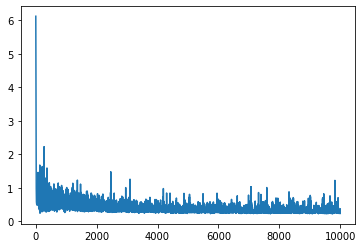

In [8]:
ax = plt.figure().add_subplot()
ax.plot(range(len(mean_squared_error)),val_mean_squared_error,label='val')

In [9]:
pre = model.predict(Xtest, batch_size=BATCH_SIZE)
print(pre)

[[2.1017199  0.829275   0.01513237]
 [3.1634386  0.7781356  0.01075981]
 [3.1026607  0.821695   0.02349721]
 ...
 [1.7654492  0.75650233 0.00687307]
 [3.5915885  0.7966328  0.02380054]
 [3.3196766  0.8441965  0.0295214 ]]


In [14]:
ae=np.maximum(pre-Ytest,Ytest-pre)
mae0=np.mean(ae[:,0])
mae1=np.mean(ae[:,1])
mae2=np.mean(ae[:,2])
mse0 = math.sqrt(mae0)
mse1 = math.sqrt(mae1)
mse2 = math.sqrt(mae2)
print("\nMAE0: {:.3f}, MAE1: {:.3f}, MAE2: {:.3f},".format(mae0, mae1,mae2))
print("\nMSE0: {:.3f}, MSE1: {:.3f}, MSE2: {:.3f},".format(mse0, mse1,mse2))



MAE0: 0.645, MAE1: 0.004, MAE2: 0.005,

MSE0: 0.803, MSE1: 0.064, MSE2: 0.073,


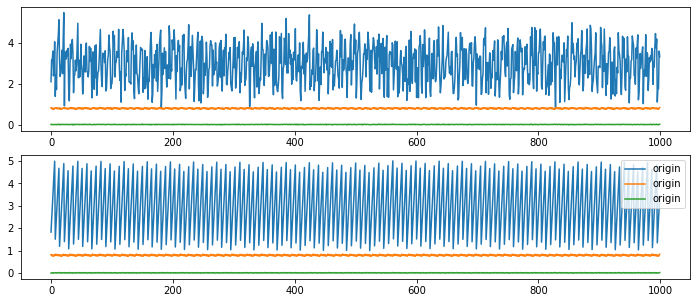

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.plot(pre,label='predctions')
plt.subplot(212)
plt.plot(Ytest,label='origin')
plt.legend()
plt.show()

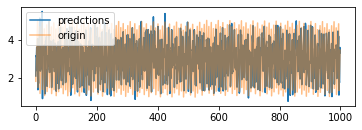

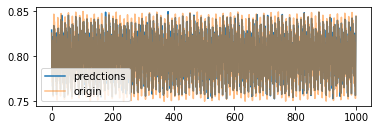

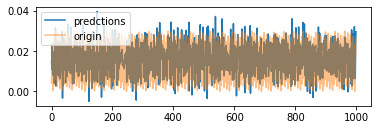

In [12]:
plt.figure(1)
plt.subplot(211)
plt.plot(pre[:,0],label='predctions',alpha=1)
plt.plot(Ytest[:,0],label='origin',alpha=0.5)
plt.legend(['predctions','origin'])

plt.figure(2)
plt.subplot(211)
plt.plot(pre[:,1],label='predctions',alpha=1)
plt.plot(Ytest[:,1],label='origin',alpha=0.5)
plt.legend()

plt.figure(3)
plt.subplot(211)
plt.plot(pre[:,2],label='predctions',alpha=1)
plt.plot(Ytest[:,2],label='origin',alpha=0.5)
plt.legend()
plt.show()

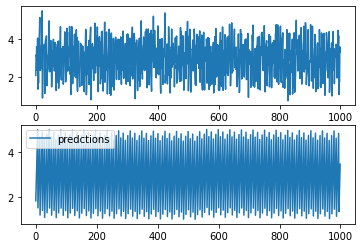

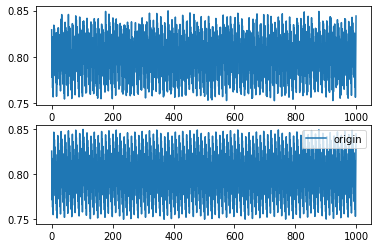

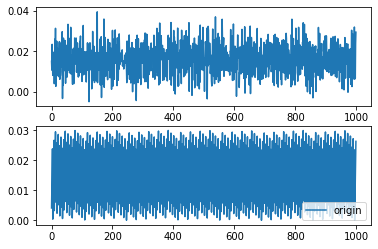

In [13]:
plt.figure(1)
plt.subplot(211)
plt.plot(pre[:,0],label='predctions')
plt.subplot(212)
plt.plot(Ytest[:,0],label='origin')
plt.legend(['predctions','origin'])

plt.figure(2)
plt.subplot(211)
plt.plot(pre[:,1],label='predctions')
plt.subplot(212)
plt.plot(Ytest[:,1],label='origin')
plt.legend()

plt.figure(3)
plt.subplot(211)
plt.plot(pre[:,2],label='predctions')
plt.subplot(212)
plt.plot(Ytest[:,2],label='origin')
plt.legend()
plt.show()